# Imports

- glob for concatenating csvs in one line, or in command line
- incorporate changes over time, on different surfaces and court
- incorportate strategies

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.decomposition import PCA
import itertools 
import datetime as pydt
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pickle
import dill
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
% matplotlib inline

pd.set_option('display.max_rows', 2000)
import warnings
warnings.filterwarnings("ignore")

UsageError: Line magic function `%` not found.


# Loading the Data

In [1]:
df1 = pd.read_excel('2001.xls')

NameError: name 'pd' is not defined

In [3]:
df2 = pd.read_excel('2002.xls')

In [4]:
df3 = pd.read_excel('2003.xls')

In [5]:
df4 = pd.read_excel('2004.xls')

In [6]:
df5 = pd.read_excel('2005.xls')

In [7]:
df6 = pd.read_excel('2006.xls')

In [8]:
df7 = pd.read_excel('2007.xls')

In [9]:
df8 = pd.read_excel('2008.xls')

In [10]:
df9 = pd.read_excel('2009.xls')

In [11]:
df10 = pd.read_excel('2010.xls')

In [12]:
df11 = pd.read_excel('2011.xls')

In [13]:
df12 = pd.read_excel('2012.xls')

In [14]:
df13 = pd.read_excel('2013.xlsx')

In [15]:
df14 = pd.read_excel('2014.xlsx')

In [16]:
df15 = pd.read_excel('2015.xlsx')

In [17]:
df16 = pd.read_excel('2016.xlsx')

In [18]:
df17 = pd.read_excel('2017.xlsx')

In [19]:
df18 = pd.read_excel('2018.xlsx')

In [20]:
df19 = pd.read_excel('2019.xlsx')

In [21]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]

In [22]:
df = pd.concat(dfs)

/Users/Tazman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [430]:
dftest.shape[0] - 49577

558

In [23]:
df.reset_index(inplace=True, drop=True)

In [164]:
pd.set_option('display.max_columns', 54)
df.head()

,ATP,AvgL,AvgW,B&WL,B&WW,B365L,B365W,Best of,CBL,CBW,Comment,Court,Date,EXL,EXW,GBL,GBW,IWL,IWW,L1,L2,L3,L4,L5,LBL,LBW,LPts,LRank,Location,Loser,Lsets,MaxL,MaxW,PSL,PSW,Round,SBL,SBW,SJL,SJW,Series,Surface,Tournament,UBL,UBW,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets
0,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0,3,NaN,NaN,NaN,NaN,NaN,101,Adelaide,Gaudenzi A.,1,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,AAPT Championships,NaN,NaN,6.0,6,6,NaN,NaN,NaN,18.0,Clement A.,2.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2,NaN,NaN,NaN,NaN,NaN,NaN,442,Adelaide,Jones A.,0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,AAPT Championships,NaN,NaN,6.0,6,NaN,NaN,NaN,NaN,81.0,Goldstein P.,2.0
2,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2001-01-01,NaN,NaN,4.0,1.12,3.5,1.1,3.0,3,NaN,NaN,NaN,NaN,NaN,NaN,485,Adelaide,Smith L.,0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,AAPT Championships,NaN,NaN,6.0,6,NaN,NaN,NaN,NaN,23.0,Haas T.,2.0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6,NaN,NaN,NaN,NaN,NaN,NaN,69,Adelaide,Rusedski G.,0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,AAPT Championships,NaN,NaN,6.0,7,NaN,NaN,NaN,NaN,10.0,Henman T.,2.0
4,1,NaN,NaN,NaN,NaN,NaN,NaN,3,3.3,1.28,Completed,Outdoor,2001-01-01,NaN,NaN,3.8,1.12,NaN,NaN,4.0,3,NaN,NaN,NaN,NaN,NaN,NaN,83,Adelaide,Arthurs W.,0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,AAPT Championships,NaN,NaN,6.0,6,NaN,NaN,NaN,NaN,7.0,Hewitt L.,2.0


# Cleaning

In [165]:
df['Comment'].value_counts()

Completed       48259
Retired          1622
Walkover          252
Disqualified        1
Sched               1
Name: Comment, dtype: int64

Let's only keep the matches that are:
- Completed
- Retired with at least one full set of play
- Walkover with at least one full set of play

These are the matches where bets stand.

In [24]:
condition_1 = df['Comment'] == 'Completed'
condition_2 = (df['Comment'] == 'Retired') & ( (df['Wsets'].isin([1, 2, 3]) | (df['Lsets'].isin([1, 2, 3]))) ) 
condition_3 = (df['Comment'] == 'Walkover') & ( (df['Wsets'].isin([1, 2, 3]) | (df['Lsets'].isin([1, 2, 3]))) ) 

In [25]:
df = df[condition_1 | condition_2 | condition_3]

In [168]:
df.shape

(49577, 54)

In [39]:
# Next, let's select the columns of interest for this project:
interesting_columns = ['Date', 'Location', 'Series','Tournament', 'Round','Court', 'Surface', 'Best of', 'Winner', 'Loser', 'WRank', 'Wsets', 'LRank', 'Lsets', 'AvgW', 'AvgL' ]

In [40]:
df = df[interesting_columns]

In [41]:
df.head()

,Date,Location,Series,Tournament,Round,Court,Surface,Best of,Winner,Loser,WRank,Wsets,LRank,Lsets,AvgW,AvgL
0,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Clement A.,Gaudenzi A.,18.0,2.0,101,1,NaN,NaN
1,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Goldstein P.,Jones A.,81.0,2.0,442,0,NaN,NaN
2,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Haas T.,Smith L.,23.0,2.0,485,0,NaN,NaN
3,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Henman T.,Rusedski G.,10.0,2.0,69,0,NaN,NaN
4,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Hewitt L.,Arthurs W.,7.0,2.0,83,0,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49577 entries, 0 to 50134
Data columns (total 16 columns):
Date          49577 non-null datetime64[ns]
Location      49577 non-null object
Series        49577 non-null object
Tournament    49577 non-null object
Round         49577 non-null object
Court         49577 non-null object
Surface       49577 non-null object
Best of       49577 non-null int64
Winner        49577 non-null object
Loser         49577 non-null object
WRank         49559 non-null float64
Wsets         49576 non-null float64
LRank         49491 non-null object
Lsets         49575 non-null object
AvgW          23256 non-null float64
AvgL          23256 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(10)
memory usage: 6.4+ MB


In [26]:
#let's also drop the rows that contain missing rank information!
df = df[~df['LRank'].isnull()]
df = df[df['LRank'] != 'NR']
df = df[~df['WRank'].isnull()]

In [27]:
#convert 'Loser Rank' to float
df['LRank'] = df['LRank'].astype(float)

In [28]:
#clean and convert 'Loser sets' to float
df['Lsets'] = df['Lsets'].map(lambda x: 1 if x == '`1' else x)

df['Lsets'] = df['Lsets'].astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49456 entries, 0 to 50134
Data columns (total 54 columns):
ATP           49456 non-null int64
AvgL          23202 non-null float64
AvgW          23202 non-null float64
B&WL          1082 non-null float64
B&WW          1082 non-null float64
B365L         43861 non-null float64
B365W         43841 non-null float64
Best of       49456 non-null int64
CBL           17338 non-null float64
CBW           17338 non-null float64
Comment       49456 non-null object
Court         49456 non-null object
Date          49456 non-null datetime64[ns]
EXL           38901 non-null float64
EXW           38896 non-null object
GBL           5009 non-null float64
GBW           5009 non-null float64
IWL           13225 non-null float64
IWW           13225 non-null float64
L1            49454 non-null float64
L2            49264 non-null object
L3            23126 non-null object
L4            4525 non-null float64
L5            1722 non-null float64
LBL        

In [29]:
df.reset_index(inplace=True, drop=True)

In [30]:
# lets clean the series column - many of these series represent the same series!
df['Series'].unique()

array(['International', 'Grand Slam', 'International Gold', 'Masters',
       'Masters Cup', 'ATP250', 'ATP500', 'Masters 1000'], dtype=object)

In [31]:
df['Series'] = df['Series'].map(lambda x: 'ATP Finals' if (x == 'Masters Cup' or x == 'Masters') else x)
df['Series'] = df['Series'].map(lambda x: 'ATP Tour Masters 1000' if (x == 'Masters 1000') else x)
df['Series'] = df['Series'].map(lambda x: 'ATP Tour 500' if (x == 'ATP500' or x == 'International Gold') else x)
df['Series'] = df['Series'].map(lambda x: 'ATP Tour 250' if (x == 'ATP250' or x =='International') else x)

# Feature Concatenation

This dataframe is missing some information - nationality of the two players! Let's concatenate this information from a dataset that does contain this information!

In [1274]:
df_cool = pd.read_csv('ATP 3.csv')

/Users/Tazman/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,5,6,7,8,9,12,14,15,16,17,18,19,22,24,25,26,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1275]:
df_cool.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1968-580,Australian Chps.,Grass,64,G,19680119,1,110023,NaN,NaN,Richard Coulthard,R,NaN,AUS,NaN,NaN,NaN,107760,NaN,NaN,Max Senior,R,NaN,AUS,NaN,NaN,NaN,12-10 7-5 4-6 7-5,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1276]:
df_cool = df_cool.iloc[115000:]

In [67]:
df_cool.rename(columns = {"winner_rank":"WRank", "loser_rank":"LRank"}, inplace=True)

In [70]:
def name_changer(name):
    return name.split()[-1] + " " +name.split()[0][0] + "."

In [71]:
df_cool['Winner'] = df_cool['winner_name'].apply(name_changer)

df_cool['Loser'] = df_cool['loser_name'].apply(name_changer)

In [ ]:
countries = pd.DataFrame()
for i in range(0, 48966):
    country_list = []
    name = df_cool.iloc[i]['Loser']
    country_list.append(df_cool.iloc[i]['loser_ioc'])
    countries[name] = country_list

In [73]:
#however, not all players in df are contained in df_cool. Let's manually code their nationalities
MAR = ['El Aynaoui Y.', 'El Aarej M.', 'El Amrani R.']
QAT = ['Al-Alawi S.K.', 'Sultan-Khalfan A.', 'Zayed M. S.',
      'Zayid M. S.', 'Zayid M.S.']
FRA = ['di Pasquale A.', 'Malcor O.', 'Mathieu P.H.',
      'Kauffmann C.', 'de Chaunac S.','Bachelot J.F',
      'Di Pasquale A.', 'Faurel J.C.','Benneteau A.',
      'Tsonga J.W.','Roger-Vasselin E.', 'De Chaunac S.',
      'Bohli S. ', 'Benneteau J. ', 'Serra F. ', 'Chardy J. ',
      'Dasnieres de Veigy J.','De Schepper K.', 'Herbert P.H.',
      'Herbert P.H.', 'Herbert P-H.', 'Herbert P.H', 'Muller A.',
      'Bonzi B.', 'Sakharov G.', 'Blancaneaux G.','Moutet C.',
      'Gaston H.', 'Benchetrit E.', 'Janvier M.', 'Humbert U.',
      'Hoang A.']
ARG = ['Chela J.I.', 'Hood M.', 'Vassallo-Arguello M.',
      'Guzman J.P','Brzezicki J.P.','Del Potro J.M.',
      'Aranguren J.M.','Trujillo G.', 'Del Potro J.', 'Del Bonis F.',
      'Zeballos H. ', 'Guzman J.P.', 'Londero J.I.',
      'Londero J.I.', 'Del Potro J. M.', 'Coria F.']
USA = ['Gambill J.M.', "O'Brien A.", 'Stark J.', 'Harper-Griffith L.',
      'Bogomolov Jr.A.', 'Albert M.','Gambill J. M',
       'Fruttero J.P.', 'Querry S.', 'Fish A.','McClune M.',
      'Kim K', "O'Neal J.", 'De Heart R.','Blake J. ',
      'Isner J. ', 'Gambill J. M.','Kuznetsov Al.', 'Sandgren T.',
      'Kwiatkowski T.S.', 'Halebian A.', 'Bangoura S.', 'Aragone J.',
      'Kypson P.', 'Korda S.', 'Reinberg E.', 'Brooksby J.',
      'Brooksby J.']
KOR = ['Lee H.T.','Do M.Q.', 'Jun W.S.', 'Nam H.W.', 'Im K.T.',
      'Jeong S.Y.', 'Jeong S.Y.', 'Kwon S.W.']
AUS = ['Breen M.', 'Perry T.', 'Guccione A.', 'Luczak P. ',
      'Smith J.P.', 'De Minaur A.', "O'Connell C.",
      'Polmans M.', 'Popyrin A.', 'Vukic A.', 'Purcell M.']
ESP = ['Carreno-Busta P.','Ferrero J.C.', 'Viloca J.A.', 'Burrieza O.',
      'Ramirez Hidalgo R.', 'Garcia-Sintes J.', 'Nadal-Parera R.',
      'Garcia-Lopez G.','Ramirez-Hidalgo R.','Matos-Gil I.',
      'Navarro-Pastor I.','Verdasco M.','Gimeno D.',
      'Gimeno-Traver D.','Rascon T.','Sanchez de Luna J.A.',
      'Granollers-Pujol M.','Salva B.','Luque D.','Vicente M.',
      'Robredo R.','Fornell M.', 'Munoz de la Nava D.',
      'Lopez-Jaen M.A.','Sanchez De Luna J.','Munoz de La Nava D.',
      'Riba-Madrid P.', 'Munoz-De La Nava D.', 'Bautista R.','Cervantes I.',
      'Ramos-Vinolas A.','Granollers Pujol G.','Gutierrez-Ferrol S.',
      'Granollers-Pujol G.', 'Brugues-Davi A.', 'Gomez-Herrera C.',
      'Menendez-Maceiras A.', 'Carballes Baena R.', 'Carballes Baena R.',
      'Artunedo Martinavarro A.', 'Vega Hernandez D.', 'Munoz De La Nava D.',
      'Carreno Busta P.', 'Bautista Agut R.', 'Ortega-Olmedo R.',
      'Samper-Montana J.', 'Lopez-Perez E.', 'Kuhn N.',
      'Ojeda Lara R.','Taberner C.', 'Martinez P.', 'Zapata Miralles B.',
      'Roca Batalla O.']
BGR = ['Stanoytchev O.', 'Donski A.', 'Andreev A.']
COL = ['Tobon M.', 'Marin L.', 'Cabal J.S.', 'Galan D.E.']
CRC = ['Marin J.A.', 'Marin J.A']
BRA = ['Hadad M.', 'Dutra Silva R.',  'Sakamoto P.','Dutra Da Silva R.',
      'De Paula F.', 'Luz O.', 'Seyboth Wild T.']
GER = ['Goellner M.K.', 'Herm-Zahlava J.','Hantschek M.',
      'Schuettler P.','Scherrer J.C.','Schuttler P.',
      'Schuttler P.', 'Schuettler R. ','Kohlschreiber P. ',
      'Becker B. ', 'Beck A. ', 'Petzschner P. ', 'Kohlschreiber P..',
      'Stebe C.M.', 'Stebe C-M.', 'Struff J.L.', 'Struff J-L.', 
       'Struff J-L.', 'Masur D.', 'Hanfmann Y.', 'Altmaier D.',
      'Molleker R.', 'Koepfer D.', 'Otte O.']
CZE = ['Kralert P.','Kutac R.',' Hajek J.','Stepanek M.',
      'Hernych J. ', 'Safranek V.', 'Kolar Z.']
EGY = ['Belal C.']
NED = ['van Lottum J.', 'van Scheppingen D.','Van Lottum J.',
      'van der Meer N.','van Gemerden M.','Van der Dium A.',
       'De Bakker T.','Huta Galung J.', 'Van Rijthoven T.',
      'Griekspoor T.']
NOR = ['Andersen J.F.']
SWE = ['Flygt K.','Prpic A.']
RUS = ['Vlasov D.', 'Ivanov-Smolensky K.', 'Kunitcin I.',
      'Bogomolov Jr. A.','Youzhny A.', 'Bogomolov A.',
      'Chekov P.', 'Kuznetsov An.', 'Tyurnev E.', 'Safiullin R.',
      'Safiullin R.', 'Vatutin A.','Karlovskiy E.']
SUI = ['Manta L.', 'Lammer M. ', 'Wawrinka S. ', 'Huesler M.A.']
UAE = ['Bahrouzyan O.']
MON = ['Lisnard J.R.']
MEX = ['Gallardo Valles M.','Gallardo M.', 'Reyes-Varela M.A.','Lopez Villasenor G.']
ITA = ['Berrettini M.',"Dell'Acqua M.",'di Mauro A.','Ascione A.','Bolelli S. ', 'Seppi A. ', 
       'Di Mauro A.', 'Viola Mat.', 'Quinzi G.', 'Bellotti R.',
      'Berrettini M', 'Mager G.', 'Napolitano S.', 'Marcora R.',
      'Bega A.', 'Caruana L.', 'Baldi F.', ]
RSA = ['de Voest R.', 'De Voest R.', 'Van der Merwe I.',
      'Van Der Merwe I.','Van D. Merwe I.']
ENG = ['MacLagan M.']
CHN = ['Zhu B.Q.', 'Zeng S.X.', 'Gong M.X.', 'Zhang Ze', 'Zhang Zh.']
KUW = ['Al Ghareeb M.','Al-Ghareeb M.','Al Ghareeb M.', 'Al-Ghareeb M.', 'Al Ghareeb M.', 'Al-Ghareeb M.']
TPE = ['Lu Y.H.', 'Wang Y.T.', 'Yu X.Y.', 'Wang Y.Jr.',
      'Wang Y. Jr', 'Xu J.C.', 'Yang T.H.', 'Jung J.',
      'Tseng C.H.']
CRO = ['Ancic I.', 'Karlovic I. ', 'Ljubicic I. ', 'Cilic M. ', 'Gojo B.']
NZL = ['King-Turner D.', 'Statham R.', 'Jones G.D.']
AUT = ['Haider-Mauer A.', 'Haider-Maurer A.','Koellerer D. ', 'Ofner S.',
      'Rodionov J.']
IND = ['Dev Varman S.', 'Prashanth V.', 'Kadhe A.', 'Gunneswaran P.']
MKD = ['Ruevski P.']
CHI = ['Podlipnik H.', 'Gonzalez F. ', 'Saavedra Corvalan C.',
      'Wu Y.']
PAK = ['Qureshi A.U.H.']
ROU = ['Luncanu P.A.']
UKR = ['Dolgopolov O.']
BEL = ['Rochus O. ', 'De Greef A.', 'De Loore J.']
SRB = ['Troicki V. ', 'Tepavac M.', 'Zekic M.', 'Kecmanovic M.']
FIN = ['Nieminen J. ']


HUN = ['Piros Z.']
JPN = ['Takahashi Y.', 'Watanuki Y.']
KAZ = ['Nedovyesov O.', 'Nedovyesov O.']
DOM = ['Estrella Burgos V.', 'Estrella Burgos V.', 'Hernandez-Fernandez J.',
      'Hernandez-Fernandez J']
MAL = ['Deen Heshaam A.']
CAN = ['Duclos P.L.', 'Auger-Aliassime F.']
SVK = ['Kucera V.', 'Horansky F.']
GRE = ['Tsitsipas S.']
POR = ['Domingues J.', 'Silva F.F.']
GBR = ['Norrie C.', 'Clarke J.']


In [74]:
for name in KUW:
    countries[name] = 'KUW'
for name in HUN:
    countries[name] = 'HUN'
for name in JPN:
    countries[name] = 'JPN'
for name in KAZ:
    countries[name] = 'KAZ'
for name in DOM:
    countries[name] = 'DOM'
for name in MAL:
    countries[name] = 'MAL'
for name in CAN:
    countries[name] = 'CAN'
for name in SVK:
    countries[name] = 'SVK'
for name in GRE:
    countries[name] = 'GRE'
for name in POR:
    countries[name] = 'POR'
for name in GBR:
    countries[name] = 'GBR'

for name in MAR:
    countries[name] = 'MAR'
for name in QAT:
    countries[name] = 'QAT'
for name in FRA:
    countries[name] = 'FRA'
for name in ARG:
    countries[name] = 'ARG'
for name in USA:
    countries[name] = 'USA'
for name in KOR:
    countries[name] = 'KOR'
for name in AUS:
    countries[name] = 'AUS'
for name in ESP:
    countries[name] = 'ESP'
for name in BGR:
    countries[name] = 'BGR'
for name in COL:
    countries[name] = 'COL'
for name in CRC:
    countries[name] = 'CRC'
for name in BRA:
    countries[name] = 'BRA'
for name in GER:
    countries[name] = 'GER'
for name in CZE:
    countries[name] = 'CZE'
for name in EGY:
    countries[name] = 'EGY'
for name in NED:
    countries[name] = 'NED'
for name in NOR:
    countries[name] = 'NOR'
for name in SWE:
    countries[name] = 'SWE'
for name in RUS:
    countries[name] = 'RUS'
for name in SUI:
    countries[name] = 'SUI'
for name in UAE:
    countries[name] = 'UAE'
for name in MON:
    countries[name] = 'MON'
for name in MEX:
    countries[name] = 'MEX'
for name in ITA:
    countries[name] = 'ITA'
for name in RSA:
    countries[name] = 'RSA'
for name in ENG:
    countries[name] = 'ENG'
for name in CHN:
    countries[name] = 'CHN'
for name in TPE:
    countries[name] = 'TPE'
for name in CRO:
    countries[name] = 'CRO'
for name in NZL:
    countries[name] = 'NZL'
for name in AUT:
    countries[name] = 'AUT'
for name in IND:
    countries[name] = 'IND'
for name in MKD:
    countries[name] = 'MKD'
for name in CHI:
    countries[name] = 'CHI'
for name in PAK:
    countries[name] = 'PAK'
for name in ROU:
    countries[name] = 'ROU'
for name in UKR:
    countries[name] = 'UKR'
for name in BEL:
    countries[name] = 'BEL'
for name in SRB:
    countries[name] = 'SRB'
for name in FIN:
    countries[name] = 'FIN'

In [77]:
def country_calc(name):
    if name in list(countries.columns):
        return countries.iloc[0][name]
    else:
        return 0

In [78]:
df['Winner Country'] = df['Winner'].apply(country_calc)

df['Loser Country'] = df['Loser'].apply(country_calc)

In [89]:
Japan = ['Tokyo']
Australia = ['Adelaide', 'Sydney', 'Melbourne', 'Brisbane']
Qatar = ['Doha']
NZ = ['Auckland']
Colombia = ['Bogota']
Denmark = ['Copenhagen']
France = ['Marseille', 'Paris', 'Lyon', 'Nice', 'Montpellier', 'Metz']
Chile = ['Vina del Mar', 'Santiago']
Argentina = ['Buenos Aires']
USA = ['Memphis', 'San Jose', 'Delray Beach', 'Scottsdale', 'Indian Wells',
      'Miami', 'Atlanta', 'Houston', 'Newport', 'Los Angeles',
      'Cincinnati', 'Indianapolis', 'Long Island', 'New York',
      'New Haven','Las Vegas','Winston-Salem', 'Washington']
Netherlands = ['Rotterdam', 'Halle', "'s-Hertogenbosch", 'Amsterdam',
              'Amersfoort']
Mexico = ['Acapulco', 'Los Cabos']
UAE = ['Dubai', 'Dubai ']
Morocco = ['Casablanca', 'Marrakech']
Portugal = ['Estoril', 'Estoril ', 'Oeiras']
Monaco = ['Monte Carlo']
Spain = ['Barcelona', 'Mallorca','Madrid', 'Cordoba']
Germany = ['Munich', 'Hamburg', 'Stuttgart', 'Dusseldorf']
Italy = ['Rome', 'Valencia', 'Milan', 'Palermo']
Austria = ['St. Polten', 'Kitzbuhel', 'Vienna', 'Portschach', 'Vienna ']
UK = ['Queens Club', 'Nottingham', 'London', 'Eastbourne']
Sweden = ['Bastad','Stockholm']
Switzerland = ['Gstaad', 'Basel', 'Geneva']
Croatia = ['Umag', 'Zagreb']
Poland = ['Sopor', 'Warsaw', 'Sopot']
Canada = ['Montreal','Toronto']
Romania = ['Bucharest']
Brazil = ['Salvador', 'Costa Do Sauipe','Sao Paulo','Rio de Janeiro']
Uzbekistan = ['Tashkent']
China = ['Shanghai', 'Beijing','Shenzhen ', 'Chengdu']
HK = ['Hong Kong']
Russia = ['Moscow','St. Petersburg']
Thailand = ['Bangkok']
Vietnam = ['Ho Chi Min City']
India = ['Portschach', 'Pune', 'Chennai', 'Mumbai']
S_Africa = ['Johannesburg ']
Serbia = ['Belgrade']
Malaysia = ['Kuala Lumpur']
Ecuador = ['Quito']
Turkey = ['Istanbul', 'Antalya']
Bulgaria = ['Sofia']
Belgium = ['Antwerp']
Hungary = ['Budapest']

In [90]:
def city_to_country(city):
    if city in Japan:
        return 'JPN'
    if city in Australia:
        return 'AUS'
    if city in India:
        return 'IND'
    if city in Qatar:
        return 'QAT'
    if city in NZ:
        return 'NZL'
    if city in Colombia:
        return 'COL'
    if city in Italy:
        return 'ITA'
    if city in Denmark:
        return 'DEN'
    if city in France:
        return 'FRA'
    if city in Chile:
        return 'CH'
    if city in Argentina:
        return 'ARG'
    if city in USA:
        return 'USA'
    if city in Netherlands:
        return 'NED'
    if city in Mexico:
        return 'MEX'
    if city in UAE:
        return 'UAE'
    if city in Morocco:
        return 'MAR'
    if city in Portugal:
        return 'POR'
    if city in Monaco:
        return 'MON'
    if city in Spain:
        return 'ESP'
    if city in Germany:
        return 'GER'
    if city in Italy:
        return 'ITA'
    if city in Austria:
        return 'AUT'
    if city in UK:
        return 'GRB'
    if city in Sweden:
        return 'SWE'
    if city in Switzerland:
        return 'SUI'
    if city in Croatia:
        return 'CRO'
    if city in Poland:
        return 'POL'
    if city in Canada:
        return 'CAN'
    if city in Romania:
        return 'ROM'
    if city in Brazil:
        return 'BRA'
    if city in Uzbekistan:
        return 'UZB'
    if city in China:
        return 'CHN'
    if city in HK:
        return 'HKG'
    if city in Russia:
        return 'RUS'
    if city in Thailand:
        return 'THA'
    if city in Vietnam:
        return 'VIE'
    if city in S_Africa:
        return 'RSA'
    if city in Serbia:
        return 'SER'
    if city in Malaysia:
        return 'MAL'
    if city in Ecuador:
        return 'ECU'
    if city in Turkey:
        return 'TUR'
    if city in Bulgaria:
        return 'BUL'
    if city in Belgium:
        return 'BEL'
    if city in Hungary:
        return 'HUN'
    else:
        return 0

In [91]:
df['Country'] = df['Location'].apply(city_to_country)

In [1277]:
df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month

# Univariate EDA

In [46]:
df.head()

,Date,Location,Series,Tournament,Round,Court,Surface,Best of,Winner,Loser,WRank,Wsets,LRank,Lsets,AvgW,AvgL
0,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Clement A.,Gaudenzi A.,18.0,2.0,101.0,1.0,NaN,NaN
1,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Goldstein P.,Jones A.,81.0,2.0,442.0,0.0,NaN,NaN
2,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Haas T.,Smith L.,23.0,2.0,485.0,0.0,NaN,NaN
3,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Henman T.,Rusedski G.,10.0,2.0,69.0,0.0,NaN,NaN
4,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Hewitt L.,Arthurs W.,7.0,2.0,83.0,0.0,NaN,NaN


In [47]:
df.shape

(49456, 16)

- We have ~50K rows of data

##  Date

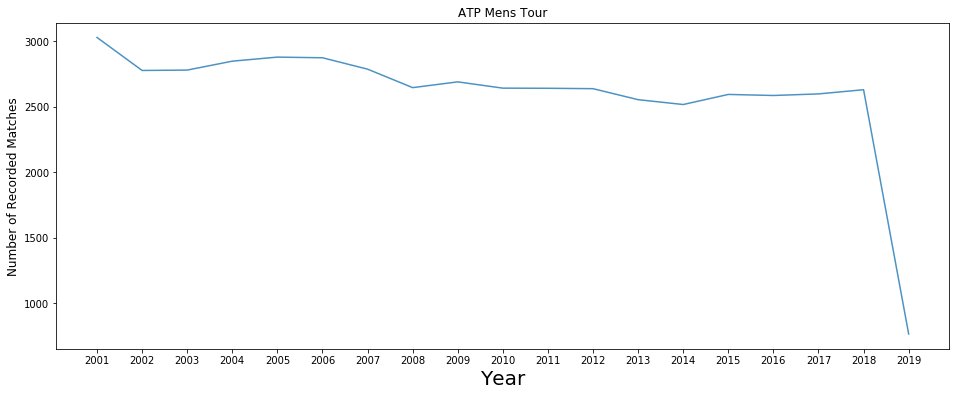

In [135]:
newyorkTimezone = df['Date'].dt.year.value_counts()
plt.figure(figsize=(16, 6))
ax = sns.lineplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('ATP Mens Tour')
plt.ylabel('Number of Recorded Matches', fontsize=12)
plt.xlabel('Year', fontsize=20)
plt.setp(ax,xticks=range(2001, 2020)) 
plt.show()

- Recorded matches span from 2001 until 2019
- There is a slow but steady decline in the number of recorded matches each year
- Most years have 2500 - 3000 recorded matches, with the exception of 2019 that only has 764 matches.

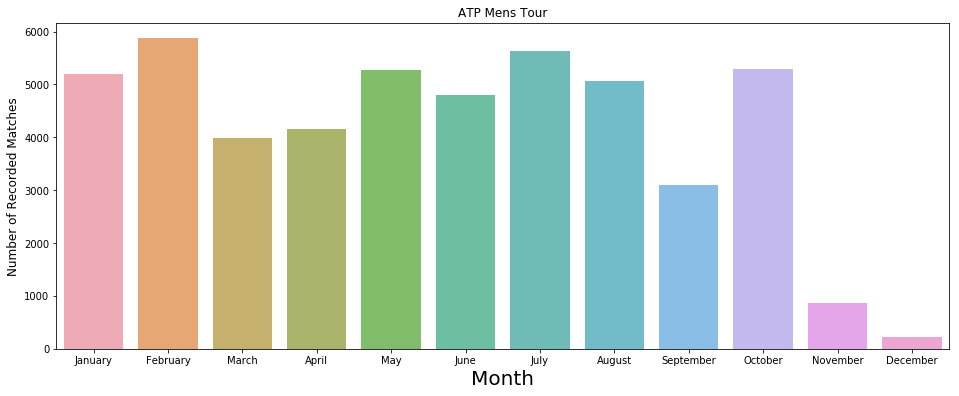

In [42]:
newyorkTimezone = df['Date'].dt.month.value_counts()
plt.figure(figsize=(16, 6))
ax = sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
ax.set(xticklabels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )
plt.title('ATP Mens Tour')
plt.ylabel('Number of Recorded Matches', fontsize=12)
plt.xlabel('Month', fontsize=20)
plt.show()

- Most of the tennis matches occur between January and October
- November and December appear to be the off months

## Location

In [48]:
df['Location'].nunique()

110

- There are 110 different locations in this dataset

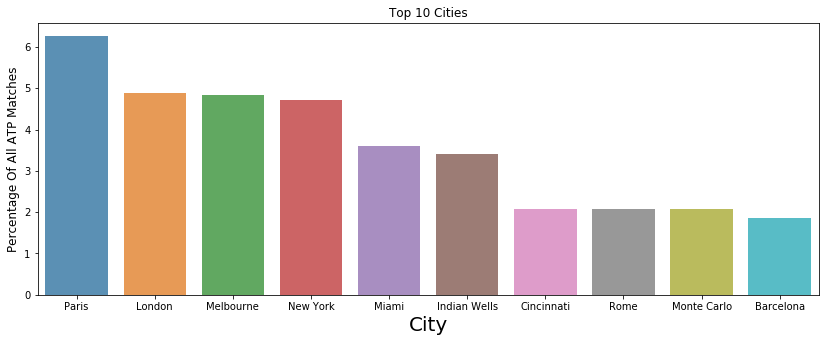

In [44]:
newyorkTimezone = df['Location'].value_counts(normalize=True).head(10)*100
plt.figure(figsize=(14, 5))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('Top 10 Cities')
plt.ylabel('Percentage Of All ATP Matches', fontsize=12)
plt.xlabel('City', fontsize=20)
plt.show()

- Most of the matches occur in the 'Grand Slam' cities: Paris, London, Melbourne and New York

In [49]:
# Let's group the cities into diffierent continents
oceania = ['Adelaide', 'Auckland', 'Sydney', 'Melbourne', 'Brisbane']
asia = ['Chennai', 'Doha', 'Dubai', 'Shanghai', 'Hong Kong', 'Tokyo', 'Dubai ',
       'Bangkok', 'Beijing', 'Ho Chi Min City', 'Mumbai', 'Kuala Lumpur', 
        'Shenzhen ', 'Chengdu', 'Pune']
south_america = ['Bogota', 'Vina del Mar', 'Buenos Aires', 'Salvador',
                'Costa Do Sauipe', 'Santiago', 'Sao Paulo', 'Rio de Janeiro',
                'Quito', 'Los Cabos']
europe = ['St. Polten','Monte Carlo','Estoril','Milan', 'Copenhagen', 'Marseille', 'Rotterdam', 'Estoril'
         'Monte Carlo', 'Barcelona', 'Mallorca', 'Munich', 'Rome', 'Hambug'
         'St. Polten', 'Paris', 'Halle', 'Queens Club', 'Nottingham',
         "'s-Hertogenbosch", 'London', 'Bastad', 'Gstaad', 'Amsterdam',
         'Stuttgart', 'Umag', 'Kitzbuhel', 'Sopot', 'Bucharest', 'Tashkent',
         'Palermo', 'Moscow', 'Lyon', 'Vienna', 'Basel', 'St. Petersburg',
         'Stockholm', 'Amersfoort', 'Madrid', 'Estoril ', 'Valencia',
         'Metz', 'Vienna ', 'Zagreb', 'Portschach', 'Warsaw', 'Belgrade',
         'Eastbourne', 'Nice', 'Montpellier', 'Oeiras', 'Dusseldorf',
         'Istanbul', 'Geneva', 'Sofia', 'Marrakech', 'Antwerp', 'Budapest',
         'Antalya', 'Cordoba', 'Hamburg']
north_america = ['Miami','Indian Wells','Scottsdale','Memphis', 'Acapulco','San Jose', 'Delray Beach', 'Scottsdale'
                'Miami', 'Atlanta', 'Houston', 'Newport',
                'Los Angeles', 'Montreal', 'Cincinnati', 'Indianapolis',
                'Washington', 'Long Island', 'New York', 'Toronto',
                'New Haven', 'Las Vegas', 'Winston-Salem']
africa = ['Casablanca', 'Johannesburg ' ]

In [50]:
df['Continent'] = ['Oceania' if x in oceania 
                   else 'Asia' if x in asia 
                   else 'South America' if x in south_america
                   else 'Europe' if x in europe 
                   else 'North America' if x in north_america
                   else 'Africa' if x in africa
                   else 0
                   for x in df['Location']]

In [51]:
df['Continent'].value_counts(normalize=True).sort_values(ascending=False)*100

Europe           49.900922
North America    27.956163
Asia              8.888709
Oceania           8.148657
South America     4.043999
Africa            1.061550
Name: Continent, dtype: float64

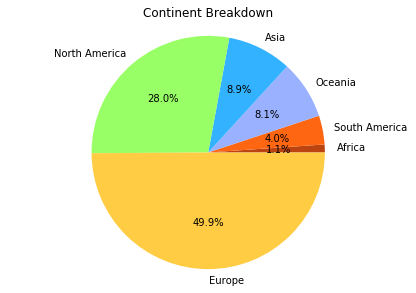

In [52]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Africa', 'South America', 'Oceania', 'Asia', 'North America', 'Europe']
sizes = [1.1, 4.0, 8.1, 8.9, 28.0, 49.9]
#colors
colors = ['#bb4411','#ff6611','#99b1ff','#33b3ff','#99ff66','#ffcc44']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=0)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Continent Breakdown')
plt.show()

- About half of all ATP matches are in Europe. This is unsurprising given that tennis is predominantly a European sport.
- Africa and South America make up a small minority of all matches

## Series

In [56]:
df['Series'].nunique()

5

- This are 5 different series in this dataset

In [57]:
df['Series'].value_counts(normalize=True, sort=False)*100

ATP Tour Masters 1000    11.630540
Grand Slam               18.604416
ATP Tour 250             44.979376
ATP Finals                9.794565
ATP Tour 500             14.991103
Name: Series, dtype: float64

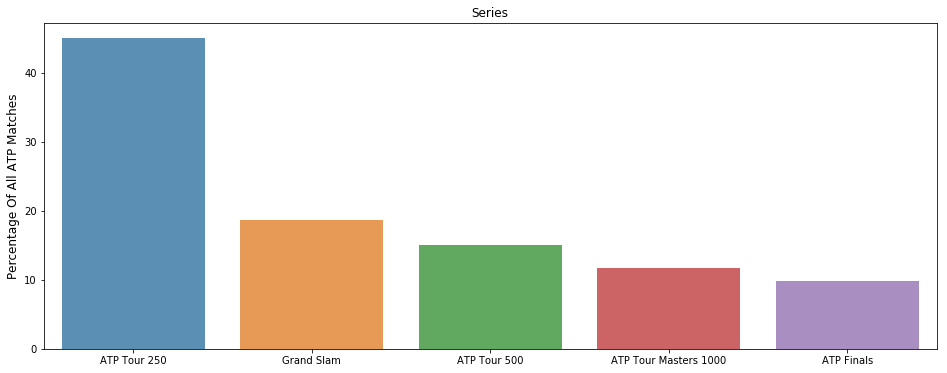

In [59]:
newyorkTimezone = df['Series'].value_counts(normalize=True)*100
plt.figure(figsize=(16, 6))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('Series')
plt.ylabel('Percentage Of All ATP Matches', fontsize=12)
plt.xlabel('', fontsize=15)
plt.show()

- ATP250 is the most popular series

## Tournament

In [60]:
df['Tournament'].nunique()

204

- There are 204 unique tournaments

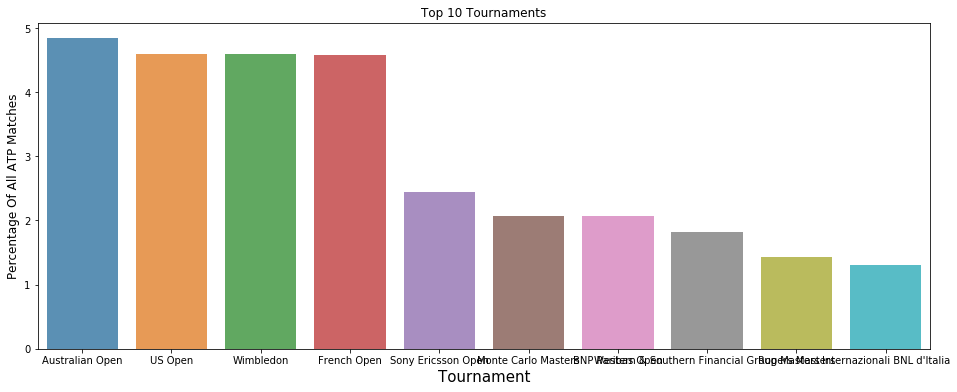

In [53]:
newyorkTimezone = df['Tournament'].value_counts(normalize=True).head(10) *100
plt.figure(figsize=(16, 6))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('Top 10 Tournaments')
plt.ylabel('Percentage Of All ATP Matches', fontsize=12)
plt.xlabel('Tournament', fontsize=15)
plt.show()

## Round

In [61]:
df['Round'].nunique()

8

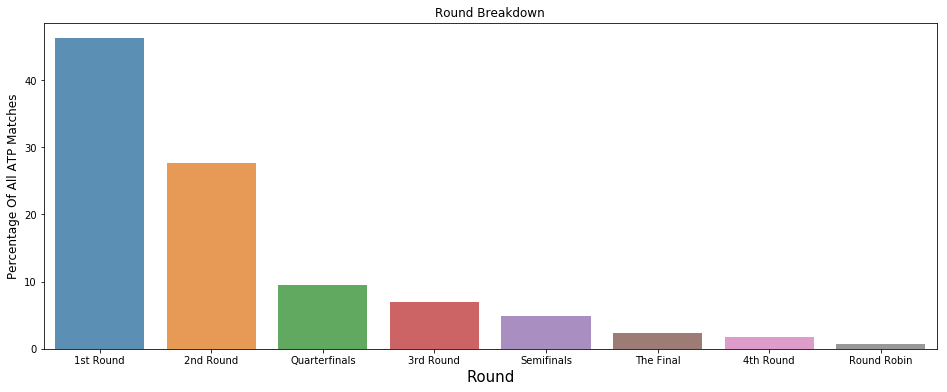

In [62]:
newyorkTimezone = df['Round'].value_counts(normalize=True).head(10) *100
plt.figure(figsize=(16, 6))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('Round Breakdown')
plt.ylabel('Percentage Of All ATP Matches', fontsize=12)
plt.xlabel('Round', fontsize=15)
plt.show()

- 46% of matches are from the 1st round

##  Court

In [56]:
df['Court'].value_counts(normalize=True)*100

Outdoor    82.10935
Indoor     17.89065
Name: Court, dtype: float64

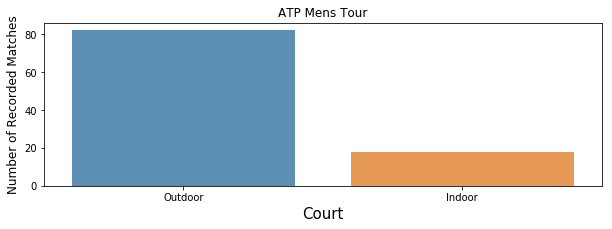

In [57]:
newyorkTimezone = df['Court'].value_counts(normalize=True)*100
plt.figure(figsize=(10, 3))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('ATP Mens Tour')
plt.ylabel('Number of Recorded Matches', fontsize=12)
plt.xlabel('Court', fontsize=15)
plt.show()

- Tennis can be played on an outdoor court or an indoor court
- The majority of matches are outdoors

## Surface

In [58]:
df['Surface'].value_counts(normalize=True)*100

Hard      53.544565
Clay      32.303462
Grass     11.044160
Carpet     3.107813
Name: Surface, dtype: float64

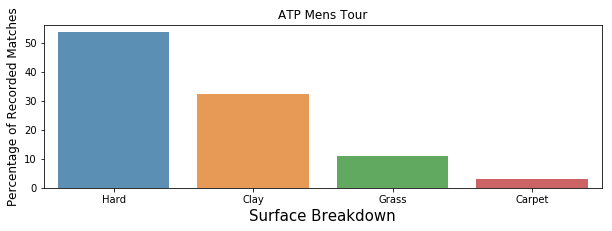

In [63]:
newyorkTimezone = df['Surface'].value_counts(normalize=True)*100
plt.figure(figsize=(10, 3))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('ATP Mens Tour')
plt.ylabel('Percentage of Recorded Matches', fontsize=12)
plt.xlabel('Surface Breakdown', fontsize=15)
plt.show()

- The majority of matches are on a hard surface

## Best of

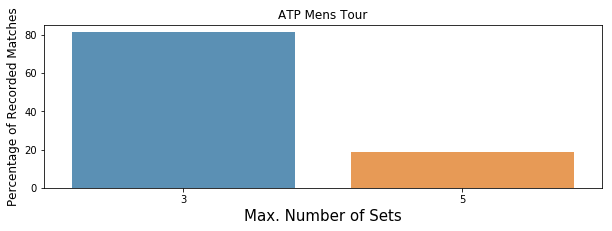

In [61]:
newyorkTimezone = df['Best of'].value_counts(normalize=True)*100
plt.figure(figsize=(10, 3))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('ATP Mens Tour')
plt.ylabel('Percentage of Recorded Matches', fontsize=12)
plt.xlabel('Max. Number of Sets', fontsize=15)
plt.show()

- about 80% of all matches played to a maximum of 3 sets.

## Winners

In [62]:
df['Winner'].describe()

count          49456
unique           908
top       Federer R.
freq            1093
Name: Winner, dtype: object

- There have been 908 unique winners!

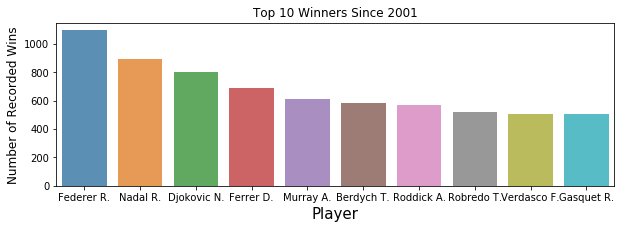

In [63]:
newyorkTimezone = df['Winner'].value_counts().head(10)
plt.figure(figsize=(10, 3))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('Top 10 Winners Since 2001')
plt.ylabel('Number of Recorded Wins', fontsize=12)
plt.xlabel('Player', fontsize=15)
plt.show()

- Roger Federer is the only player that has recorded over 1000 wins

In [64]:
df.shape[0]/908

54.46696035242291

On average, a winner wins 54 times

## Ranks

In [65]:
df[['WRank', 'LRank']].describe()

,WRank,LRank
count,49456.000000,49456.000000
mean,58.847278,92.089655
std,73.170834,116.242271
min,1.000000,1.000000
25%,17.000000,35.000000
50%,41.000000,65.000000
75%,77.000000,105.000000
max,1890.000000,2159.000000


Text(0, 0.5, 'Mean Score (/800)')

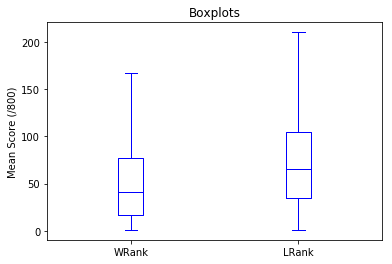

In [66]:
#disregarding the outliers, lets assess box plots of these variables
boxplots = df[['WRank','LRank']].plot.box(color='b',title = 'Boxplots', showfliers=False);
boxplots.set_ylabel('Mean Score (/800)')

- Both distributions are positively skewed
- Winners tend to have higher ranks than losers

# Multivariate EDA

In [67]:
df.head(1)

,Date,Location,Series,Tournament,Round,Court,Surface,Best of,Winner,Loser,WRank,LRank,AvgW,AvgL,Continent
0,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Clement A.,Gaudenzi A.,18.0,101.0,NaN,NaN,Oceania


## Rank and Win %

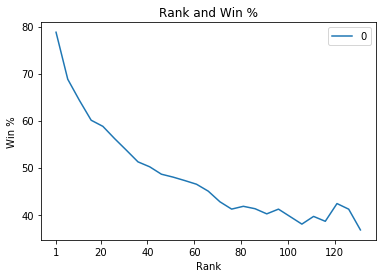

In [96]:
win_per = pd.DataFrame()
for i in range(1, 132, 5):
    win_percentages = []
    
    condition_1 = ((df['WRank'] == i) | (df['WRank'] == i+1) | (df['WRank'] == i+2) | (df['WRank'] == i+3) |(df['WRank'] == i+4))
    condition_2 = ((df['LRank'] == i) | (df['LRank'] == i+1) | (df['LRank'] == i+2) | (df['LRank'] == i+3) |(df['LRank'] == i+4))
    
    number_wins = df[(condition_1)].shape[0]
    number_losses = df[(condition_2)].shape[0]   
    win_perc = (number_wins / (number_wins + number_losses))
    win_percentages.append(win_perc)
  
    win_per[i] = win_percentages

win_per = win_per*100
win_per = win_per.T
#win_per.columns = ['Grand Slam', 'Non-Grand Slam']
ax = win_per.plot.line(title = 'Rank and Win %')

ax.set_xlabel("Rank");
ax.set_ylabel("Win %");
ax.get_legend().set_bbox_to_anchor((1, 1));
ax.set_xticks([1, 20, 40, 60, 80, 100, 120]);


In [98]:
(df[df['WRank'] < df['LRank']].shape[0] / df.shape[0])*100

65.66442898738273

- The overall upset rate is ~34%.
- How does this upset rate vary for different match conditions - eg. different courts, surfaces, tournaments, etc?

## Tournament, Rank and Win %

In [81]:
# let's investigate the top 4 players win percentage across these different types of matches
series_comparison = pd.DataFrame()
condition_1 = df['Series'] == 'Grand Slam'
condition_2 = df['Series'] != 'Grand Slam'

In [82]:
series_comparison = pd.DataFrame()
condition_1 = df['Series'] == 'Grand Slam'
condition_2 = df['Series'] != 'Grand Slam'

for name in ['Federer R.', 'Nadal R.', 'Djokovic N.', 'Murray A.']:
    series_performance = []
    
    grand_slam_wins = df[(condition_1) & (df['Winner'] == name)].shape[0]
    grand_slam_losses = df[(condition_1) & (df['Loser'] == name)].shape[0]
    grand_slam_win_per = (grand_slam_wins / (grand_slam_wins + grand_slam_losses))*100
    series_performance.append(grand_slam_win_per)
    
    n_grand_slam_wins = df[(condition_2) & (df['Winner'] == name)].shape[0]
    n_grand_slam_losses = df[(condition_2) & (df['Loser'] == name)].shape[0]
    n_grand_slam_win_per = (n_grand_slam_wins / (n_grand_slam_wins + n_grand_slam_losses))*100
    series_performance.append(n_grand_slam_win_per)

    series_comparison[name] = series_performance
    
series_comparison = series_comparison.T
series_comparison.columns = ['Grand Slam','Non-Grand Slam']

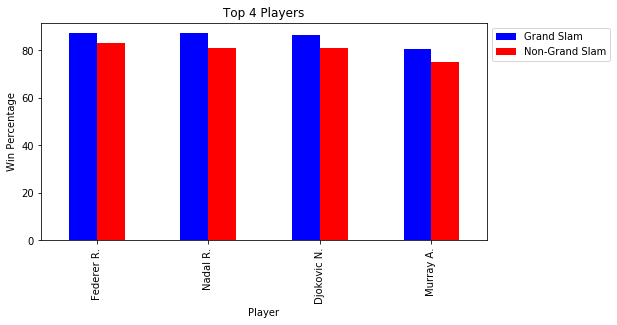

In [83]:
ax = series_comparison.plot(kind='bar', color=['b', 'r', 'g', 'k'], figsize=(8, 4), title='Top 4 Players');
ax.set_xlabel("Player");
ax.set_ylabel("Win Percentage");
ax.get_legend().set_bbox_to_anchor((1, 1))

- The top players have higher winning rates in grand slam tournaments than non-grand slams tournaments

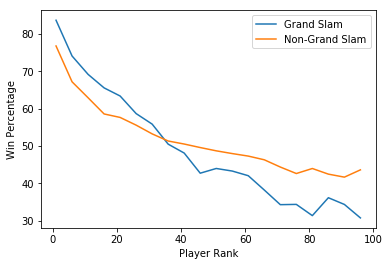

In [100]:
win_per = pd.DataFrame()
for i in range(1, 100, 5):
    win_percentages = []
    
    condition_1 = ((df['WRank'] == i) | (df['WRank'] == i+1) | (df['WRank'] == i+2) | (df['WRank'] == i+3) |(df['WRank'] == i+4))
    condition_2 = ((df['LRank'] == i) | (df['LRank'] == i+1) | (df['LRank'] == i+2) | (df['LRank'] == i+3) |(df['LRank'] == i+4))
    
    number_wins = df[(condition_1) & (df['Series'] == 'Grand Slam')].shape[0]
    number_losses = df[(condition_2) & (df['Series'] == 'Grand Slam')].shape[0]   
    win_perc = (number_wins / (number_wins + number_losses))
    win_percentages.append(win_perc)
    
    number_wins = df[(condition_1) & (df['Series'] != 'Grand Slam')].shape[0]
    number_losses = df[(condition_2) & (df['Series'] != 'Grand Slam')].shape[0]   
    win_perc = (number_wins / (number_wins + number_losses))
    win_percentages.append(win_perc)
  
    win_per[i] = win_percentages
    
win_per = win_per.T
win_per = 100* win_per
win_per.columns = ['Grand Slam', 'Non-Grand Slam']
ax = win_per.plot.line()

#ax = location_comparison.plot(kind='bar', color=['b', 'r', 'g', 'k'], figsize=(8, 4), title='Top 4 Players Win Percentage by Location');
ax.set_xlabel("Player Rank");
ax.set_ylabel("Win Percentage");
ax.get_legend().set_bbox_to_anchor((1, 1))

## Location, Rank and Win %

In [121]:
location_comparison = pd.DataFrame()

for name in ['Federer R.', 'Nadal R.', 'Djokovic N.', 'Murray A.']:
    if name == 'Federer R.':
        country = Switzerland
    if name == 'Nadal R.':
        country = Spain   
    if name == 'Djokovic N.':
        country = Serbia       
    if name == 'Murray A.':
        country = UK
        
    location_list = []
    
    home_total = df[(df['Location'].isin(country))&((df['Winner'] == name) | (df['Loser'] == name))].shape[0]
    home_wins = df[(df['Location'].isin(country))&(df['Winner'] == name)].shape[0]
    home_win_per = 100*home_wins/home_total
    location_list.append(home_win_per)

    away_total = df[(~df['Location'].isin(country))&((df['Winner'] == name) | (df['Loser'] == name))].shape[0]
    away_wins = df[(~df['Location'].isin(country))&(df['Winner'] == name)].shape[0]
    away_win_per = 100*away_wins/away_total
    location_list.append(away_win_per)
    
    location_comparison[name] = location_list
    
location_comparison = location_comparison.T
location_comparison.columns = ['Home', 'Away']

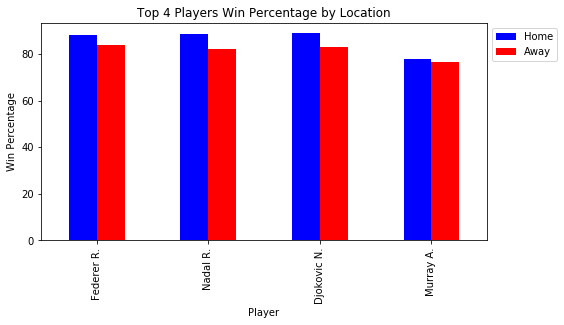

In [111]:
ax = location_comparison.plot(kind='bar', color=['b', 'r', 'g', 'k'], figsize=(8, 4), title='Top 4 Players Win Percentage by Location');
ax.set_xlabel("Player");
ax.set_ylabel("Win Percentage");
ax.get_legend().set_bbox_to_anchor((1, 1))

In [119]:
win_per = pd.DataFrame()
for i in range(1, 200, 5):
    win_percentages = []
    number_wins = df[   ((df['WRank'] == i) | (df['WRank'] == i+1) | (df['WRank'] == i+2) | (df['WRank'] == i+3) | (df['WRank'] == i+4)) & (df['Winner Country'] == df['Country'])    ].shape[0]
    number_losses = df[ ((df['LRank'] == i) | (df['LRank'] == i+1) | (df['LRank'] == i+2)| (df['LRank'] == i+3)| (df['LRank'] == i+4)) &  (df['Loser Country'] == df['Country'])     ].shape[0]
    home_win_per = 100 * number_wins/(number_wins + number_losses)
    win_percentages.append(home_win_per)
    
    number_wins = (df[((df['WRank'] == i) | (df['WRank'] == i+1) | (df['WRank'] == i+2)| (df['WRank'] == i+3)| (df['WRank'] == i+4)) & (df['Winner Country'] != df['Country'])].shape[0])
    number_losses = (df[((df['LRank'] == i) | (df['LRank'] == i+1) | (df['LRank'] == i+2)| (df['LRank'] == i+3)| (df['LRank'] == i+4)) & (df['Loser Country'] != df['Country'])].shape[0])
    away_win_per = (100 * number_wins)/(number_wins + number_losses)
    win_percentages.append(away_win_per)
    
    win_per[i] = win_percentages

win_per = win_per.T
win_per.columns = ['Home', 'Away']

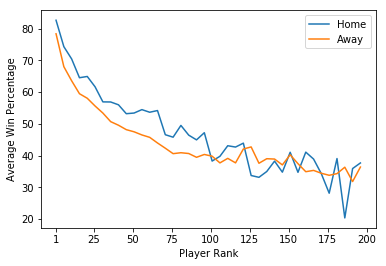

In [120]:
ax = win_per.plot.line();
ax.set_xlabel("Player Rank");
ax.set_ylabel("Average Win Percentage");
ax.get_legend().set_bbox_to_anchor((1, 1))

plt.setp(ax,xticks=[1, 25, 50, 75, 100, 125, 150, 175, 200]);

## Surface and Win %

In [122]:
surface_comparison = pd.DataFrame()

for name in ['Federer R.', 'Nadal R.', 'Djokovic N.', 'Murray A.']:
    surface_list = []
    
    hard_wins = df[(df['Winner'] == name) & (df['Surface'] == 'Hard')].shape[0]
    hard_losses = df[(df['Loser'] == name) & (df['Surface'] == 'Hard')].shape[0]
    hard_win_per = hard_wins/(hard_wins+hard_losses)
    surface_list.append(hard_win_per)
    
    clay_wins = df[(df['Winner'] == name) & (df['Surface'] == 'Clay')].shape[0]
    clay_losses = df[(df['Loser'] == name) & (df['Surface'] == 'Clay')].shape[0]
    clay_win_per = clay_wins/(clay_wins+clay_losses)
    surface_list.append(clay_win_per)
    
    grass_wins = df[(df['Winner'] == name) & (df['Surface'] == 'Grass')].shape[0]
    grass_losses = df[(df['Loser'] == name) & (df['Surface'] == 'Grass')].shape[0]
    grass_win_per = grass_wins/(grass_wins+grass_losses)
    surface_list.append(grass_win_per)
    
    surface_comparison[name] = surface_list
    
surface_comparison = surface_comparison.T * 100
surface_comparison.columns = ['Hard', 'Clay', 'Grass']

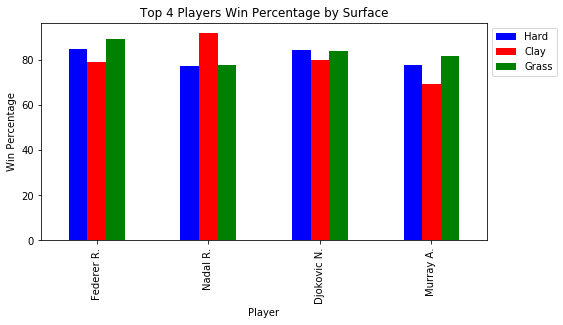

In [123]:
ax = surface_comparison.plot(kind='bar', color=['b', 'r', 'g', 'k'], figsize=(8, 4), title='Top 4 Players Win Percentage by Surface');
ax.set_xlabel("Player");
ax.set_ylabel("Win Percentage");
ax.get_legend().set_bbox_to_anchor((1, 1))

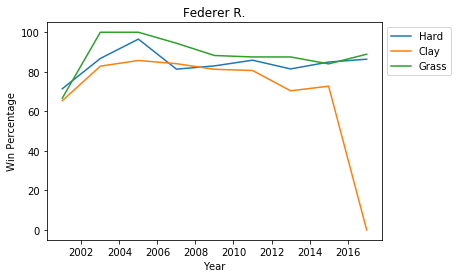

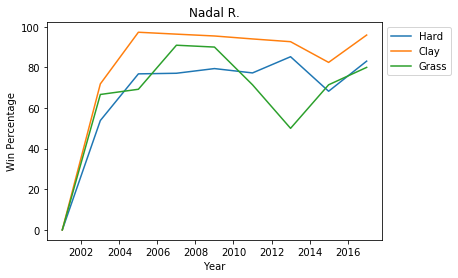

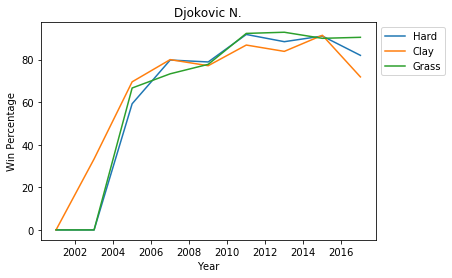

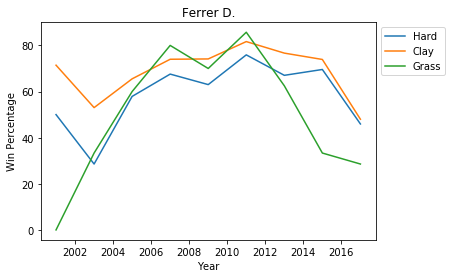

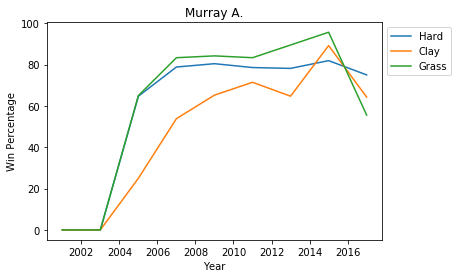

In [106]:
for name in df['Winner'].value_counts().head().index:

    surface_comparison = pd.DataFrame()

    for i in range(2001, 2019, 2):
        condition = (df['Year'] == i) | ((df['Year'] == i+1))
        surface_list = []
        df2 = df[condition]
        hard_wins = df2[(df2['Winner'] == name) & (df2['Surface'] == 'Hard')].shape[0]
        hard_losses = df2[(df2['Loser'] == name) & (df2['Surface'] == 'Hard')].shape[0]
        if (hard_wins + hard_losses) != 0 :
            hard_win_per = hard_wins/(hard_wins+hard_losses)
            surface_list.append(hard_win_per)
        else:
            surface_list.append(0)
    
        clay_wins = df2[(df2['Winner'] == name) & (df2['Surface'] == 'Clay')].shape[0]
        clay_losses = df2[(df2['Loser'] == name) & (df2['Surface'] == 'Clay')].shape[0]
        if (clay_wins + clay_losses) != 0 :
            clay_win_per = clay_wins/(clay_wins+clay_losses)
            surface_list.append(clay_win_per)
        else:
            surface_list.append(0)
        
        grass_wins = df2[(df2['Winner'] == name) & (df2['Surface'] == 'Grass')].shape[0]
        grass_losses = df2[(df2['Loser'] == name) & (df2['Surface'] == 'Grass')].shape[0]
        if (grass_wins + grass_losses) != 0 :
            grass_win_per = grass_wins/(grass_wins+grass_losses)
            surface_list.append(grass_win_per)
        else:
            surface_list.append(0)
    
        surface_comparison[i] = surface_list
    
    surface_comparison = surface_comparison.T * 100
    surface_comparison.columns = ['Hard', 'Clay', 'Grass']

    ax = surface_comparison.plot.line(title = name);
    ax.set_xlabel("Year");
    ax.set_ylabel("Win Percentage");
    ax.get_legend().set_bbox_to_anchor((1, 1))

## Court, Rank and Win %

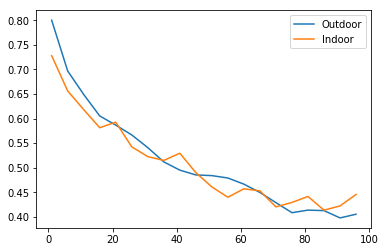

In [124]:
win_per = pd.DataFrame()
for i in range(1, 100, 5):
    win_percentages = []
    
    condition_1 = ((df['WRank'] == i) | (df['WRank'] == i+1) | (df['WRank'] == i+2) | (df['WRank'] == i+3) |(df['WRank'] == i+4))
    condition_2 = ((df['LRank'] == i) | (df['LRank'] == i+1) | (df['LRank'] == i+2) | (df['LRank'] == i+3) |(df['LRank'] == i+4))
    
    number_wins = df[(condition_1) & (df['Court'] == 'Outdoor')].shape[0]
    number_losses = df[(condition_2) & (df['Court'] == 'Outdoor')].shape[0]   
    win_perc = (number_wins / (number_wins + number_losses))
    win_percentages.append(win_perc)
    
    number_wins = df[(condition_1) & (df['Court'] == 'Indoor')].shape[0]
    number_losses = df[(condition_2) & (df['Court'] == 'Indoor')].shape[0]   
    win_perc = (number_wins / (number_wins + number_losses))
    win_percentages.append(win_perc)
  
    win_per[i] = win_percentages
    
win_per = win_per.T
win_per.columns = ['Outdoor', 'Indoor']
win_per.plot.line()


## Sets Lost and Win %

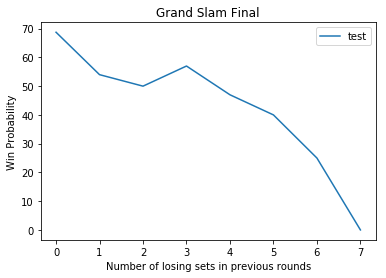

In [127]:
grandslam = pd.DataFrame()
grandslam['test'] = [68.75, 54, 50, 57, 47, 40, 25, 0]
ax = grandslam.plot.line(title = 'Grand Slam Final')
ax.set_xlabel("Number of losing sets in previous rounds");
ax.set_ylabel("Win Probability");
ax.get_legend().set_bbox_to_anchor((1, 1))

# 6. Feature Engineering

Let's create a column for 'Player 1' and 'Player 2'.

In [526]:
#let's randomise who is player 1
s=df[['Winner', 'Loser']].columns.to_series().sample(len(df),replace = True)
df['Player 1']=df.lookup(df.index,s)

#and then let player 2 be the other player
df['Player 2'] = np.where(df['Player 1']==df['Winner'], df['Loser'], df['Winner'])

#let the target be whether or not player 1 wins
df['Target'] = np.where(df['Player 1']==df['Winner'], 1, 0)
df.head()

,ATP,AvgL,AvgW,B&WL,B&WW,B365L,B365W,Best of,CBL,CBW,Comment,Court,Date,EXL,EXW,GBL,GBW,IWL,IWW,L1,L2,L3,L4,L5,LBL,LBW,LPts,...,MaxL,MaxW,PSL,PSW,Round,SBL,SBW,SJL,SJW,Series,Surface,Tournament,UBL,UBW,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets,exact tournament,Player 1,Player 2,Target
0,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,AAPT Championships,NaN,NaN,6.0,6,6,NaN,NaN,NaN,18.0,Clement A.,2.0,0,Clement A.,Gaudenzi A.,1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,AAPT Championships,NaN,NaN,6.0,6,NaN,NaN,NaN,NaN,81.0,Goldstein P.,2.0,0,Goldstein P.,Jones A.,1
2,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2001-01-01,NaN,NaN,4.0,1.12,3.5,1.1,3.0,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,AAPT Championships,NaN,NaN,6.0,6,NaN,NaN,NaN,NaN,23.0,Haas T.,2.0,0,Smith L.,Haas T.,0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,AAPT Championships,NaN,NaN,6.0,7,NaN,NaN,NaN,NaN,10.0,Henman T.,2.0,0,Henman T.,Rusedski G.,1
4,1,NaN,NaN,NaN,NaN,NaN,NaN,3,3.3,1.28,Completed,Outdoor,2001-01-01,NaN,NaN,3.8,1.12,NaN,NaN,4.0,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,AAPT Championships,NaN,NaN,6.0,6,NaN,NaN,NaN,NaN,7.0,Hewitt L.,2.0,0,Hewitt L.,Arthurs W.,1


Features
Model features cannot be based on one player alone. They need to capture the interactions between the two players. For example, how do the players differ in ranking, experience, suitability to the surface, etc. As such, features will have the following structure:

Feature$_i$ = Player 1 Statistic $_i$ - Player 2 Statistic $_i$
 
For example, if 'Player 1' has rank 50 and 'Player 2' has rank 40, we could calculate a 'Rank difference' feature:

Rank difference = 50 - 40 = 10

1) Rank difference

2) Experience difference

3) Career win percentage difference

4) Surface suitability difference

5) Court suitability difference

6) Set number suitability difference

7) Match history

## Rank Difference

In [128]:
df['Player 1 Rank'] = np.where(df['Player 1']==df['Winner'], df['WRank'], df['LRank'])
df['Player 2 Rank'] = np.where(df['Player 1']==df['Winner'], df['LRank'], df['WRank'])
df['Rank difference'] = df['Player 1 Rank'] - df['Player 2 Rank']

## Experience Difference

In [58]:
player_1_cumulative_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['P1']
    condition = ((df_helper['Winner'] == player_1) | (df_helper['Loser'] == player_1))
    player_1_total_matches = df_helper[condition].shape[0]
    player_1_cumulative_matches.append(player_1_total_matches)
    
df['player_1_cumulative_matches'] = player_1_cumulative_matches

In [59]:
player_2_cumulative_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['P2']
    condition = ((df_helper['Winner'] == player_2) | (df_helper['Loser'] == player_2))
    player_2_total_matches = df_helper[condition].shape[0]
    player_2_cumulative_matches.append(player_2_total_matches)
    
df['player_2_cumulative_matches'] = player_2_cumulative_matches

In [66]:
df.to_csv('edited4.csv')

In [60]:
df['Experience difference'] = df['player_1_cumulative_matches'] - df['player_2_cumulative_matches']

In [ ]:
df.head(1)

## Career Win Percentage Difference

In [ ]:
player_1_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = (df_helper['Winner'] == player_1)
    player_1_total_wins = df_helper[condition].shape[0]
    player_1_wins.append(player_1_total_wins)
    
df['player_1_wins'] = player_1_wins

In [ ]:
player_2_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = (df_helper['Winner'] == player_2)
    player_2_total_wins = df_helper[condition].shape[0]
    player_2_wins.append(player_2_total_wins)
    
df['player_2_wins'] = player_2_wins

In [ ]:
df['Player 1 career win %'] = (df['player_1_wins']/df['player_1_cumulative_matches'])*100
df['Player 2 career win %'] = (df['player_2_wins']/df['player_2_cumulative_matches'])*100
df['Career win % difference'] = df['Player 1 career win %'] - df['Player 2 career win %']

In [ ]:
df.head(1)

## Surface Suitability Difference

In [ ]:
player_1_cumulative_hard_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = (((df_helper['Winner'] == player_1) | (df_helper['Loser'] == player_1)) & (df_helper['Surface'] == 'Hard'))
    player_1_total_hard_matches = df_helper[condition].shape[0]
    player_1_cumulative_hard_matches.append(player_1_total_hard_matches)    
df['player_1_cumulative_hard_matches'] = player_1_cumulative_hard_matches

In [ ]:
player_1_cumulative_hard_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = ((df_helper['Winner'] == player_1) & (df_helper['Surface'] == 'Hard'))
    player_1_total_hard_wins = df_helper[condition].shape[0]
    player_1_cumulative_hard_wins.append(player_1_total_hard_wins)   
df['player_1_cumulative_hard_wins'] = player_1_cumulative_hard_wins

In [ ]:
player_1_cumulative_clay_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = (((df_helper['Winner'] == player_1) | (df_helper['Loser'] == player_1)) & (df_helper['Surface'] == 'Clay'))
    player_1_total_clay_matches = df_helper[condition].shape[0]
    player_1_cumulative_clay_matches.append(player_1_total_clay_matches)    
df['player_1_cumulative_clay_matches'] = player_1_cumulative_clay_matches

player_1_cumulative_clay_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = ((df_helper['Winner'] == player_1) & (df_helper['Surface'] == 'Clay'))
    player_1_total_clay_wins = df_helper[condition].shape[0]
    player_1_cumulative_clay_wins.append(player_1_total_clay_wins)   
df['player_1_cumulative_clay_wins'] = player_1_cumulative_clay_wins

In [ ]:
player_1_cumulative_grass_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = (((df_helper['Winner'] == player_1) | (df_helper['Loser'] == player_1)) & (df_helper['Surface'] == 'Grass'))
    player_1_total_grass_matches = df_helper[condition].shape[0]
    player_1_cumulative_grass_matches.append(player_1_total_grass_matches)    
df['player_1_cumulative_grass_matches'] = player_1_cumulative_grass_matches

player_1_cumulative_grass_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = ((df_helper['Winner'] == player_1) & (df_helper['Surface'] == 'Grass'))
    player_1_total_grass_wins = df_helper[condition].shape[0]
    player_1_cumulative_grass_wins.append(player_1_total_grass_wins)   
df['player_1_cumulative_grass_wins'] = player_1_cumulative_grass_wins

In [ ]:
player_1_cumulative_carpet_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = (((df_helper['Winner'] == player_1) | (df_helper['Loser'] == player_1)) & (df_helper['Surface'] == 'Carpet'))
    player_1_total_carpet_matches = df_helper[condition].shape[0]
    player_1_cumulative_carpet_matches.append(player_1_total_carpet_matches)    
df['player_1_cumulative_carpet_matches'] = player_1_cumulative_carpet_matches

player_1_cumulative_carpet_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = ((df_helper['Winner'] == player_1) & (df_helper['Surface'] == 'Carpet'))
    player_1_total_carpet_wins = df_helper[condition].shape[0]
    player_1_cumulative_carpet_wins.append(player_1_total_carpet_wins)   
df['player_1_cumulative_carpet_wins'] = player_1_cumulative_carpet_wins

In [ ]:
player_2_cumulative_hard_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = (((df_helper['Winner'] == player_2) | (df_helper['Loser'] == player_2)) & (df_helper['Surface'] == 'Hard'))
    player_2_total_hard_matches = df_helper[condition].shape[0]
    player_2_cumulative_hard_matches.append(player_2_total_hard_matches)    
df['player_2_cumulative_hard_matches'] = player_2_cumulative_hard_matches

player_2_cumulative_hard_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = ((df_helper['Winner'] == player_2) & (df_helper['Surface'] == 'Hard'))
    player_2_total_hard_wins = df_helper[condition].shape[0]
    player_2_cumulative_hard_wins.append(player_2_total_hard_wins)   
df['player_2_cumulative_hard_wins'] = player_2_cumulative_hard_wins



player_2_cumulative_clay_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = (((df_helper['Winner'] == player_2) | (df_helper['Loser'] == player_2)) & (df_helper['Surface'] == 'Clay'))
    player_2_total_clay_matches = df_helper[condition].shape[0]
    player_2_cumulative_clay_matches.append(player_2_total_clay_matches)    
df['player_2_cumulative_clay_matches'] = player_2_cumulative_clay_matches

player_2_cumulative_clay_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = ((df_helper['Winner'] == player_2) & (df_helper['Surface'] == 'Clay'))
    player_2_total_clay_wins = df_helper[condition].shape[0]
    player_2_cumulative_clay_wins.append(player_2_total_clay_wins)   
df['player_2_cumulative_clay_wins'] = player_2_cumulative_clay_wins


player_2_cumulative_grass_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = (((df_helper['Winner'] == player_2) | (df_helper['Loser'] == player_2)) & (df_helper['Surface'] == 'Grass'))
    player_2_total_grass_matches = df_helper[condition].shape[0]
    player_2_cumulative_grass_matches.append(player_2_total_grass_matches)    
df['player_2_cumulative_grass_matches'] = player_2_cumulative_grass_matches

player_2_cumulative_grass_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = ((df_helper['Winner'] == player_2) & (df_helper['Surface'] == 'Grass'))
    player_2_total_grass_wins = df_helper[condition].shape[0]
    player_2_cumulative_grass_wins.append(player_2_total_grass_wins)   
df['player_2_cumulative_grass_wins'] = player_2_cumulative_grass_wins


player_2_cumulative_carpet_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = (((df_helper['Winner'] == player_2) | (df_helper['Loser'] == player_2)) & (df_helper['Surface'] == 'Carpet'))
    player_2_total_carpet_matches = df_helper[condition].shape[0]
    player_2_cumulative_carpet_matches.append(player_2_total_carpet_matches)    
df['player_2_cumulative_carpet_matches'] = player_2_cumulative_carpet_matches

player_2_cumulative_carpet_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = ((df_helper['Winner'] == player_2) & (df_helper['Surface'] == 'Carpet'))
    player_2_total_carpet_wins = df_helper[condition].shape[0]
    player_2_cumulative_carpet_wins.append(player_2_total_carpet_wins)   
df['player_2_cumulative_carpet_wins'] = player_2_cumulative_carpet_wins

In [ ]:
df.head(1)

In [ ]:
df['Player 1 Hard Performance'] = 100 * df['player_1_cumulative_hard_wins'] / df['player_1_cumulative_hard_matches']
df['Player 1 Clay Performance'] = 100 * df['player_1_cumulative_clay_wins'] / df['player_1_cumulative_clay_matches']
df['Player 1 Grass Performance'] = 100 * df['player_1_cumulative_grass_wins'] / df['player_1_cumulative_grass_matches']
df['Player 1 Carpet Performance'] = 100 * df['player_1_cumulative_carpet_wins'] / df['player_1_cumulative_carpet_matches']

df['Player 2 Hard Performance'] = 100 * df['player_2_cumulative_hard_wins'] / df['player_2_cumulative_hard_matches']
df['Player 2 Clay Performance'] = 100 * df['player_2_cumulative_clay_wins'] / df['player_2_cumulative_clay_matches']
df['Player 2 Grass Performance'] = 100 * df['player_2_cumulative_grass_wins'] / df['player_2_cumulative_grass_matches']
df['Player 2 Carpet Performance'] = 100 * df['player_2_cumulative_carpet_wins'] / df['player_2_cumulative_carpet_matches']


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
Player_1_Surface_Performance = []
for i in range(0, 49456):
    Player_1_Surface_Performance.append(df['Player 1 '+df.iloc[i]['Surface']+' Performance'][i])
    
df['Player 1 Surface Performance'] = Player_1_Surface_Performance

In [ ]:
Player_2_Surface_Performance = []
for i in range(0, 49456):
    Player_2_Surface_Performance.append(df['Player 2 '+df.iloc[i]['Surface']+' Performance'][i])
    
df['Player 2 Surface Performance'] = Player_2_Surface_Performance

In [ ]:
df['Surface suitability difference'] = df['Player 1 Surface Performance'] - df['Player 2 Surface Performance']

In [ ]:
df.hail(1)

## Court Suitability Difference

In [ ]:
player_1_cumulative_outdoor_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = (((df_helper['Winner'] == player_1) | (df_helper['Loser'] == player_1)) & (df_helper['Court'] == 'Outdoor'))
    player_1_total_outdoor_matches = df_helper[condition].shape[0]
    player_1_cumulative_outdoor_matches.append(player_1_total_outdoor_matches)    
df['player_1_cumulative_outdoor_matches'] = player_1_cumulative_outdoor_matches

player_1_cumulative_outdoor_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = ((df_helper['Winner'] == player_1) & (df_helper['Court'] == 'Outdoor'))
    player_1_total_outdoor_wins = df_helper[condition].shape[0]
    player_1_cumulative_outdoor_wins.append(player_1_total_outdoor_wins)   
df['player_1_cumulative_outdoor_wins'] = player_1_cumulative_outdoor_wins

In [ ]:
player_1_cumulative_indoor_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = (((df_helper['Winner'] == player_1) | (df_helper['Loser'] == player_1)) & (df_helper['Court'] == 'Indoor'))
    player_1_total_indoor_matches = df_helper[condition].shape[0]
    player_1_cumulative_indoor_matches.append(player_1_total_indoor_matches)    
df['player_1_cumulative_indoor_matches'] = player_1_cumulative_indoor_matches

player_1_cumulative_indoor_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = ((df_helper['Winner'] == player_1) & (df_helper['Court'] == 'Indoor'))
    player_1_total_indoor_wins = df_helper[condition].shape[0]
    player_1_cumulative_indoor_wins.append(player_1_total_indoor_wins)   
df['player_1_cumulative_indoor_wins'] = player_1_cumulative_indoor_wins


In [ ]:
player_2_cumulative_outdoor_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = (((df_helper['Winner'] == player_2) | (df_helper['Loser'] == player_2)) & (df_helper['Court'] == 'Outdoor'))
    player_2_total_outdoor_matches = df_helper[condition].shape[0]
    player_2_cumulative_outdoor_matches.append(player_2_total_outdoor_matches)    
df['player_2_cumulative_outdoor_matches'] = player_2_cumulative_outdoor_matches

player_2_cumulative_outdoor_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = ((df_helper['Winner'] == player_2) & (df_helper['Court'] == 'Outdoor'))
    player_2_total_outdoor_wins = df_helper[condition].shape[0]
    player_2_cumulative_outdoor_wins.append(player_2_total_outdoor_wins)   
df['player_2_cumulative_outdoor_wins'] = player_2_cumulative_outdoor_wins

player_2_cumulative_indoor_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = (((df_helper['Winner'] == player_2) | (df_helper['Loser'] == player_1)) & (df_helper['Court'] == 'Indoor'))
    player_2_total_indoor_matches = df_helper[condition].shape[0]
    player_2_cumulative_indoor_matches.append(player_2_total_indoor_matches)    
df['player_2_cumulative_indoor_matches'] = player_2_cumulative_indoor_matches

player_2_cumulative_indoor_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = ((df_helper['Winner'] == player_2) & (df_helper['Court'] == 'Indoor'))
    player_2_total_indoor_wins = df_helper[condition].shape[0]
    player_2_cumulative_indoor_wins.append(player_2_total_indoor_wins)   
df['player_2_cumulative_indoor_wins'] = player_2_cumulative_indoor_wins


In [ ]:
df['Player 1 Outdoor Performance'] = 100*df['player_1_cumulative_outdoor_wins'] / df['player_1_cumulative_outdoor_matches']
df['Player 1 Indoor Performance'] = 100*df['player_1_cumulative_indoor_wins'] / df['player_1_cumulative_indoor_matches']
df['Player 2 Outdoor Performance'] = 100*df['player_2_cumulative_outdoor_wins'] / df['player_2_cumulative_outdoor_matches']
df['Player 2 Indoor Performance'] = 100*df['player_2_cumulative_indoor_wins'] / df['player_2_cumulative_indoor_matches']

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
Player_1_Court_Performance = []
for i in range(0, 49456):
    Player_1_Court_Performance.append(df['Player 1 '+df.iloc[i]['Court']+' Performance'][i])
    
df['Player 1 Court Performance'] = Player_1_Court_Performance

In [ ]:
Player_2_Court_Performance = []
for i in range(0, 49456):
    Player_2_Court_Performance.append(df['Player 2 '+df.iloc[i]['Court']+' Performance'][i])
    
df['Player 2 Court Performance'] = Player_2_Court_Performance

In [ ]:
df['Court suitability difference'] = df['Player 1 Court Performance'] - df['Player 2 Court Performance']

## Set Number Suitability

In [ ]:
player_1_cumulative_3R_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = (((df_helper['Winner'] == player_1) | (df_helper['Loser'] == player_1)) & (df_helper['Best of'] == 3))
    player_1_total_3R_matches = df_helper[condition].shape[0]
    player_1_cumulative_3R_matches.append(player_1_total_3R_matches)    
df['player_1_cumulative_3R_matches'] = player_1_cumulative_3R_matches

player_1_cumulative_3R_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = ((df_helper['Winner'] == player_1) & (df_helper['Best of'] == 3))
    player_1_total_3R_wins = df_helper[condition].shape[0]
    player_1_cumulative_3R_wins.append(player_1_total_3R_wins)   
df['player_1_cumulative_3R_wins'] = player_1_cumulative_3R_wins


In [ ]:
player_1_cumulative_5R_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = (((df_helper['Winner'] == player_1) | (df_helper['Loser'] == player_1)) & (df_helper['Best of'] == 5))
    player_1_total_5R_matches = df_helper[condition].shape[0]
    player_1_cumulative_5R_matches.append(player_1_total_5R_matches)    
df['player_1_cumulative_5R_matches'] = player_1_cumulative_5R_matches

player_1_cumulative_5R_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    condition = ((df_helper['Winner'] == player_1) & (df_helper['Best of'] == 5))
    player_1_total_5R_wins = df_helper[condition].shape[0]
    player_1_cumulative_5R_wins.append(player_1_total_5R_wins)   
df['player_1_cumulative_5R_wins'] = player_1_cumulative_5R_wins

In [ ]:
player_2_cumulative_3R_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = (((df_helper['Winner'] == player_2) | (df_helper['Loser'] == player_2)) & (df_helper['Best of'] == 3))
    player_2_total_3R_matches = df_helper[condition].shape[0]
    player_2_cumulative_3R_matches.append(player_2_total_3R_matches)    
df['player_2_cumulative_3R_matches'] = player_2_cumulative_3R_matches

player_2_cumulative_3R_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = ((df_helper['Winner'] == player_2) & (df_helper['Best of'] == 3))
    player_2_total_3R_wins = df_helper[condition].shape[0]
    player_2_cumulative_3R_wins.append(player_2_total_3R_wins)   
df['player_2_cumulative_3R_wins'] = player_2_cumulative_3R_wins



player_2_cumulative_5R_matches = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = (((df_helper['Winner'] == player_2) | (df_helper['Loser'] == player_2)) & (df_helper['Best of'] == 5))
    player_2_total_5R_matches = df_helper[condition].shape[0]
    player_2_cumulative_5R_matches.append(player_2_total_5R_matches)    
df['player_2_cumulative_5R_matches'] = player_2_cumulative_5R_matches

player_2_cumulative_5R_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_2 = df.iloc[i]['Player 2']
    condition = ((df_helper['Winner'] == player_2) & (df_helper['Best of'] == 5))
    player_2_total_5R_wins = df_helper[condition].shape[0]
    player_2_cumulative_5R_wins.append(player_2_total_5R_wins)   
df['player_2_cumulative_5R_wins'] = player_2_cumulative_5R_wins

In [ ]:
df['Player 1 3R Performance'] = 100*df['player_1_cumulative_3R_wins'] / df['player_1_cumulative_3R_matches']
df['Player 1 5R Performance'] = 100*df['player_1_cumulative_5R_wins'] / df['player_1_cumulative_5R_matches']
df['Player 2 3R Performance'] = 100*df['player_2_cumulative_3R_wins'] / df['player_2_cumulative_3R_matches']
df['Player 2 5R Performance'] = 100*df['player_2_cumulative_5R_wins'] / df['player_2_cumulative_5R_matches']

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
Player_1_Num_Sets_Performance = []
for i in range(0, 49456):
    Player_1_Num_Sets_Performance.append(df['Player 1 '+str(df.iloc[i]['Best of'])+'R Performance'][i])
    
df['Player 1 Set Number Suitability'] = Player_1_Num_Sets_Performance

In [ ]:
Player_2_Num_Sets_Performance = []
for i in range(0, 49456):
    Player_2_Num_Sets_Performance.append(df['Player 2 '+str(df.iloc[i]['Best of'])+'R Performance'][i])
    
df['Player 2 Set Number Suitability'] = Player_2_Num_Sets_Performance

In [ ]:
df['Set number suitability difference'] = df['Player 1 Set Number Suitability'] - df['Player 2 Set Number Suitability']

## Head2Head Record

In [ ]:
player_1_h2h_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    player_2 = df.iloc[i]['Player 2']
    wins_against_opponent = df_helper[((df_helper['Winner'] == player_1) & (df_helper['Loser'] == player_2))].shape[0]
    player_1_h2h_wins.append(wins_against_opponent)

df['player_1_h2h_wins'] = player_1_h2h_wins

player_2_h2h_wins = []
for i in range(0, 49456):
    df_helper = df.iloc[0:i]
    player_1 = df.iloc[i]['Player 1']
    player_2 = df.iloc[i]['Player 2']
    wins_against_opponent = df_helper[((df_helper['Winner'] == player_2) & (df_helper['Loser'] == player_1))].shape[0]
    player_2_h2h_wins.append(wins_against_opponent)

df['player_2_h2h_wins'] = player_2_h2h_wins

df['h2h_difference'] = df['player_1_h2h_wins'] - df['player_2_h2h_wins']

In [ ]:
df['total h2h'] = df['player_1_h2h_wins'] + df['player_2_h2h_wins']

In [ ]:
df['h2h % difference'] = 100*(df['player_1_h2h_wins'] / df['total h2h'] - df['player_2_h2h_wins'] / df['total h2h'])

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df['Location'].nunique()

In [6]:
df.to_csv('edited.csv')

In [10]:
pd.read_csv('final_clean.csv')

,Unnamed: 0,Date,Country,Series,Tournament,Round,Surface,Court,Best of,P1,P1 Rank,P1 Nationality,P1 Career Win %,P1 Surface Win %,P1 In-Tourn Sets Lost,P1 Wins Against P2,P1 Av Betting Odds,P2,P2 Rank,P2 Nationality,P2 Career Win %,P2 Surface Win %,P2 In-Tourn Sets Lost,P2 Wins Against P1,P2 Av Betting odds,Rank difference,Career Win % Diff,Surface Win % Diff,H2H Diff,In-Tourn Sets Lost Diff,Tournament Adv,Location Adv,Target,Rank difference binary,In-Tourn Sets Lost Diff Binary
0,0,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Gaudenzi A.,101.0,ITA,0.000000,0.000000,0.0,0,0.00,Clement A.,18.0,FRA,0.000000,0.000000,0.0,0,0.00,83.0,0.000000,0.000000,0,0.0,0,0,0,1,0
1,1,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Jones A.,442.0,AUS,0.000000,0.000000,0.0,0,0.00,Goldstein P.,81.0,USA,0.000000,0.000000,0.0,0,0.00,361.0,0.000000,0.000000,0,0.0,0,0,0,1,0
2,2,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Smith L.,485.0,AUS,0.000000,0.000000,0.0,0,0.00,Haas T.,23.0,GER,0.000000,0.000000,0.0,0,0.00,462.0,0.000000,0.000000,0,0.0,0,0,0,1,0
3,3,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Henman T.,10.0,GBR,0.000000,0.000000,0.0,0,0.00,Rusedski G.,69.0,GBR,0.000000,0.000000,0.0,0,0.00,-59.0,0.000000,0.000000,0,0.0,0,0,1,-1,0
4,4,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Hewitt L.,7.0,AUS,0.000000,0.000000,0.0,0,0.00,Arthurs W.,83.0,AUS,0.000000,0.000000,0.0,0,0.00,-76.0,0.000000,0.000000,0,0.0,0,0,1,-1,0
5,5,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Johansson T.,39.0,SWE,0.000000,0.000000,0.0,0,0.00,Mantilla F.,99.0,ESP,0.000000,0.000000,0.0,0,0.00,-60.0,0.000000,0.000000,0,0.0,0,0,1,-1,0
6,6,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Ljubicic I.,91.0,CRO,0.000000,0.000000,0.0,0,0.00,Sargsian S.,94.0,ARM,0.000000,0.000000,0.0,0,0.00,-3.0,0.000000,0.000000,0,0.0,0,0,1,-1,0
7,7,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Malisse X.,127.0,BEL,0.000000,0.000000,0.0,0,0.00,Woodruff C.,67.0,USA,0.000000,0.000000,0.0,0,0.00,60.0,0.000000,0.000000,0,0.0,0,0,1,1,0
8,8,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Puentes G.,92.0,ESP,0.000000,0.000000,0.0,0,0.00,Martin A.,79.0,SVK,0.000000,0.000000,0.0,0,0.00,13.0,0.000000,0.000000,0,0.0,0,0,0,1,0
9,9,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Massu N.,87.0,CHI,0.000000,0.000000,0.0,0,0.00,Sluiter R.,95.0,NED,0.000000,0.000000,0.0,0,0.00,-8.0,0.000000,0.000000,0,0.0,0,0,1,-1,0


In [354]:
dfz = pd.read_csv('edited.csv')

In [355]:
dfz.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Date,Location,Series,Tournament,Round,Court,Surface,Best of,Winner,Loser,WRank,LRank,AvgW,AvgL,Player 1,Player 2,Target,Player 1 Rank,Player 2 Rank,Rank difference,Player 1 Average odds,Player 2 Average odds,Odds difference,...,Player 1 Outdoor Performance,Player 1 Indoor Performance,Player 2 Outdoor Performance,Player 2 Indoor Performance,Player 1 Court Performance,Player 2 Court Performance,Court suitability difference,player_1_cumulative_3R_matches,player_1_cumulative_3R_wins,player_1_cumulative_5R_matches,player_1_cumulative_5R_wins,player_2_cumulative_3R_matches,player_2_cumulative_3R_wins,player_2_cumulative_5R_matches,player_2_cumulative_5R_wins,Player 1 3R Performance,Player 1 5R Performance,Player 2 3R Performance,Player 2 5R Performance,Player 1 Set Number Suitability,Player 2 Set Number Suitability,Set number suitability difference,player_1_h2h_wins,player_2_h2h_wins,h2h_difference,total h2h,h2h % difference
0,0,0,0,0,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Clement A.,Gaudenzi A.,18.0,101.0,0.0,0.0,Gaudenzi A.,Clement A.,0,101.0,18.0,83.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0


In [358]:
dfz = df

In [351]:
df_test.head(1)

,Unnamed: 0,Unnamed: 0.1,Date,Location,Series,Tournament,Round,Court,Surface,Best of,Winner,Loser,WRank,LRank,AvgW,AvgL,Winner Country,Loser Country,Country,Year,Player 1,Player 2,Target
0,0,0,2001-01-01,Adelaide,International,AAPT Championships,1st Round,Outdoor,Hard,3,Clement A.,Gaudenzi A.,18.0,101.0,NaN,NaN,FRA,ITA,AUS,2001,Gaudenzi A.,Clement A.,0


In [361]:
df_test = df

In [349]:
df_test = pd.read_csv('edited3.csv')

## Tournament Advantage

In [469]:
first = list(np.where((df['Series']== 'Grand Slam') & 
                      (df['Player 1 Rank'] < 32) & (df['Player 2 Rank'] > 32), 1, 0))

second = list(np.where((df['Series']== 'Grand Slam') &
                       (df['Player 1 Rank'] > 32) & (df['Player 2 Rank'] < 32), -1, 0))

tournament_adv = [x + y for x, y in zip(first, second)]
df['tournament adv'] = tournament_adv

## Home Advantage

In [470]:
df['Player 1 Country'] = np.where((df['Player 1'] == df['Winner']), df['Winner Country'], df['Loser Country'] )

df['Player 2 Country'] = np.where((df['Player 2'] == df['Winner']), df['Winner Country'], df['Loser Country'] )

In [471]:
first = list(np.where(
    (df['Player 1 Country']== df['Country']) & 
    (df['Player 2 Country'] != df['Country']) & 
    (df['Player 1 Rank'] < 100), 
    1, 0))

second = list(np.where(
    (df['Player 2 Country']== df['Country']) & 
    (df['Player 1 Country'] != df['Country']) & 
    (df['Player 2 Rank'] < 100), 
    -1, 0))


home_adv = [x + y for x, y in zip(first, second)]
df['Home adv'] = home_adv

## Number of Sets Lost in Tournament

In [646]:
player_1_sets_lost = []
for i in range (0, 49456):
    player_1 = df.iloc[i]['P1']
    df_helper = df.iloc[:i]
    condition_1 = (df_helper['Winner'] == player_1)
    condition_2 = (df_helper['Year'] == df.iloc[i]['Year'])
    condition_3 = (df_helper['Tournament'] == df.iloc[i]['Tournament'])
    relevant_matches = df_helper[condition_1 & condition_2 & condition_3]
    sets_lost = relevant_matches['Lsets'].sum()
    player_1_sets_lost.append(sets_lost)

    
    

In [652]:
player_2_sets_lost = []
for i in range (0, 49456):
    player_2 = df.iloc[i]['P2']
    df_helper = df.iloc[:i]
    condition_1 = (df_helper['Winner'] == player_2)
    condition_2 = (df_helper['Year'] == df.iloc[i]['Year'])
    condition_3 = (df_helper['Tournament'] == df.iloc[i]['Tournament'])
    relevant_matches = df_helper[condition_1 & condition_2 & condition_3]
    sets_lost = relevant_matches['Lsets'].sum()
    player_2_sets_lost.append(sets_lost)

In [653]:
player_2_sets_lost[-5:]

[1.0, 1.0, 0.0, 1.0, 1.0]

In [301]:
player_2_sets_lost = []
for i in range (0, 49456):
    player_2 = df.iloc[i]['Player 2']
    df_helper = df.iloc[:i]
    condition_1 = (df_helper['Winner'] == player_2)
    condition_2 = (df_helper['Year'] == df.iloc[i]['Year'])
    condition_3 = (df_helper['Tournament'] == df.iloc[i]['Tournament'])
    relevant_matches = df_helper[condition_1 & condition_2 & condition_3]
    sets_lost = relevant_matches['Lsets'].sum()
    if sets_lost > 0:
        player_2_sets_lost.append(sets_lost)
    else:
        player_2_sets_lost.append(0)
    

In [475]:
df['player_2_sets_lost'] = player_2_sets_lost

In [476]:
df['sets_lost_difference'] = df['player_1_sets_lost'] - df['player_2_sets_lost']

# Preprocessing

In [138]:
df = pd.read_csv('final_clean.csv').drop(columns = ['Unnamed: 0', 'In-Tourn Sets Lost Diff Binary', 'Rank difference binary'])

In [5]:
df = pd.read_csv('edited4.csv')

In [1607]:
pd.set_option('display.max_columns', 40)
df.head()

,Date,Country,Series,Tournament,Round,Surface,Court,Best of,P1,P1 Rank,P1 Nationality,P1 Career Win %,P1 Surface Win %,P1 In-Tourn Sets Lost,P1 Wins Against P2,P1 Av Betting Odds,P2,P2 Rank,P2 Nationality,P2 Career Win %,P2 Surface Win %,P2 In-Tourn Sets Lost,P2 Wins Against P1,P2 Av Betting odds,Rank difference,Career Win % Diff,Surface Win % Diff,H2H Diff,In-Tourn Sets Lost Diff,Tournament Adv,Location Adv,Target
0,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Gaudenzi A.,101.0,ITA,0.0,0.0,0.0,0,0.0,Clement A.,18.0,FRA,0.0,0.0,0.0,0,0.0,83.0,0.0,0.0,0,0.0,0,0,0
1,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Jones A.,442.0,AUS,0.0,0.0,0.0,0,0.0,Goldstein P.,81.0,USA,0.0,0.0,0.0,0,0.0,361.0,0.0,0.0,0,0.0,0,0,0
2,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Smith L.,485.0,AUS,0.0,0.0,0.0,0,0.0,Haas T.,23.0,GER,0.0,0.0,0.0,0,0.0,462.0,0.0,0.0,0,0.0,0,0,0
3,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Henman T.,10.0,GBR,0.0,0.0,0.0,0,0.0,Rusedski G.,69.0,GBR,0.0,0.0,0.0,0,0.0,-59.0,0.0,0.0,0,0.0,0,0,1
4,2001-01-01,AUS,International,AAPT Championships,1st Round,Hard,Outdoor,3,Hewitt L.,7.0,AUS,0.0,0.0,0.0,0,0.0,Arthurs W.,83.0,AUS,0.0,0.0,0.0,0,0.0,-76.0,0.0,0.0,0,0.0,0,0,1


In [6]:
ss = StandardScaler()

In [57]:
df['Winner'] = df_temp['Winner']
df['Loser'] = df_temp['Loser']

In [7]:
#train: 2002 - 2013
#test: 2014 - 2019

train = df.iloc[3028:-13673]
test = df.iloc[-13673:]

X_train_num = train[['Career Win % Diff', 'Rank difference','Surface Win % Diff','H2H Diff', 'In-Tourn Sets Lost Diff',
       'Experience difference']]
X_train_dum = train[['Tournament Adv', 'Location Adv']]
X_train = pd.concat([pd.DataFrame(ss.fit_transform(X_train_num)), X_train_dum.reset_index(drop=True)], axis=1)

X_test_num = test[['Career Win % Diff', 'Rank difference','Surface Win % Diff','H2H Diff', 'In-Tourn Sets Lost Diff',
       'Experience difference']]
X_test_dum = test[['Tournament Adv', 'Location Adv']]
X_test = pd.concat([pd.DataFrame(ss.fit_transform(X_test_num), )
                    , X_test_dum.reset_index(drop=True)], axis=1)


y_train = train[['Target']].reset_index(drop=True)
y_test = test[['Target']].reset_index(drop=True)

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [462]:
X_train = ss.fit_transform(train[['Rank difference']])
#X_train_dum = train[['Tournament Adv', 'Location Adv']]
#X_train = pd.concat([pd.DataFrame(ss.fit_transform(X_train_num)), X_train_dum.reset_index(drop=True)], axis=1)

In [463]:
X_train

array([[ 0.10830948],
       [ 0.21076968],
       [ 1.22805309],
       ...,
       [-1.4359121 ],
       [-1.19439877],
       [-1.24562887]])

In [181]:
X_test_dum

,Tournament Adv,Location Adv
35783,0,0
35784,0,0
35785,0,0
35786,0,0
35787,0,0
35788,0,0
35789,0,0
35790,0,0
35791,0,0
35792,0,0


In [182]:
X_test

,0,1,2,3,4,5,Tournament Adv,Location Adv
0,0.854613,-0.172819,0.550639,0.022103,0.015173,1.137983,0,0
1,1.052388,-0.281408,1.054834,0.992293,1.362309,0.684095,0,0
2,0.332440,-0.025449,0.413082,0.507198,0.015173,-0.009424,0,0
3,0.661831,-0.537367,0.594089,-0.462992,0.015173,0.512125,0,0
4,0.698886,-0.304677,1.867036,0.992293,0.015173,0.723563,0,0
5,-0.246842,0.253779,-1.067360,0.022103,0.015173,0.957556,0,0
6,0.253696,-0.715763,-0.090556,0.022103,0.015173,0.272494,0,0
7,1.002596,-0.591661,1.124112,0.022103,0.015173,0.323239,0,0
8,-1.145052,0.191728,-0.745658,0.022103,0.015173,-0.029159,0,0
9,1.017045,0.005576,0.907966,0.022103,-1.331963,1.789215,0,0


In [5]:
ss = StandardScaler()

In [458]:
#train: 2002 - 2013
#test: 2014 - 2019

train = df.iloc[3028:-13673]
test = df.iloc[-13673:]

X_train_num = train[['Career Win % Diff', 'Rank difference','Surface Win % Diff','H2H Diff', 'In-Tourn Sets Lost Diff',
       'Experience difference']]
X_train_dum = train[['Tournament Adv', 'Location Adv']]
X_train = pd.concat([pd.DataFrame(ss.fit_transform(X_train_num)), X_train_dum.reset_index(drop=True)], axis=1)

X_test_num = test[['Career Win % Diff', 'Rank difference','Surface Win % Diff','H2H Diff', 'In-Tourn Sets Lost Diff',
       'Experience difference']]
X_test_dum = test[['Tournament Adv', 'Location Adv']]
X_test = pd.concat([pd.DataFrame(ss.fit_transform(X_test_num), )
                    , X_test_dum.reset_index(drop=True)], axis=1)


y_train = train[['Target']].reset_index(drop=True)
y_test = test[['Target']].reset_index(drop=True)

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [2359]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32755, 8)
(13673, 8)
(32755, 1)
(13673, 1)


# Modelling

In [520]:
# create a function to calculate the accuracy/log loss of the model on training set (using CV)
from sklearn.metrics import log_loss, make_scorer
log_loss_scorer = make_scorer(log_loss, needs_proba=True)
log_loss_scorer

def evaluation(model, X_train, y_train):
    print('Train accuracy', np.mean(cross_val_score(model, X_train, y_train, cv =5)))
    print('Train Log Loss', np.mean(cross_val_score(model, X_train, y_train, cv =5, scoring=log_loss_scorer)))

In [521]:
evaluation(best_GB, X_train, y_train)

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Train accuracy 0.6697615505342384


/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Train Log Loss 0.605798256955633


In [459]:
# create a function to calculate the train/test accuracy/log loss

def evaluation(model):
    print('Train accuracy', model.score(X_train, y_train))
    print('Test accuracy', model.score(X_test, y_test))
    print('Train Log Loss', log_loss(y_train, model.predict_proba(X_train)))
    print('Test Log Loss', log_loss(y_test, model.predict_proba(X_test)))

In [2380]:
# create a function to print the confusion matrix & classification report
def print_cm_cr(y_test, y_pred):
    confusion = pd.crosstab(y_test['Target'], y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print(confusion)
    print()
    print(classification_report(y_test, y_pred))

In [2525]:
#create a learning curve function 
print(__doc__)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


Automatically created module for IPython interactive environment


## Baseline

In [67]:
data = df.iloc[3028:]

In [68]:
np.round(data[ (data['Rank difference'] < 0) & (data['Target'] == 1) |
      ((data['Rank difference'] > 0) & (data['Target'] == 0))].shape[0]/data.shape[0], 3)*100

65.9

In [2483]:
data = df.iloc[3028:]

In [2494]:
np.round(data[ (data['Rank difference'] < 0) & (data['Target'] == 1) |
      ((data['Rank difference'] > 0) & (data['Target'] == 0))].shape[0]/data.shape[0], 3)*100

65.9

## Logistic Regression

In [536]:
lr =  LogisticRegression()

lr_params = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4, 2, 40),
    'solver':['liblinear']
}

lr_gs = GridSearchCV(lr, lr_params, cv=5, verbose=1)
lr_gs.fit(X_train, y_train)
best_lr = lr_gs.best_estimator_
print(lr_gs.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversi

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

{'C': 0.05878016072274912, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   35.5s finished
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1440]:
evaluation(best_lr)

Train accuracy 0.6688749809189437
Test accuracy 0.6624003510568274
Train Log Loss 0.6096480996672826
Test Log Loss 0.6104972762416976


In [2417]:
print_cm_cr(y_test, best_lr.predict(X_test))

Predicted     0     1    All
Actual                      
0          4574  2257   6831
1          2359  4483   6842
All        6933  6740  13673

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      6831
           1       0.67      0.66      0.66      6842

   micro avg       0.66      0.66      0.66     13673
   macro avg       0.66      0.66      0.66     13673
weighted avg       0.66      0.66      0.66     13673



<module 'matplotlib.pyplot' from '/Users/Tazman/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

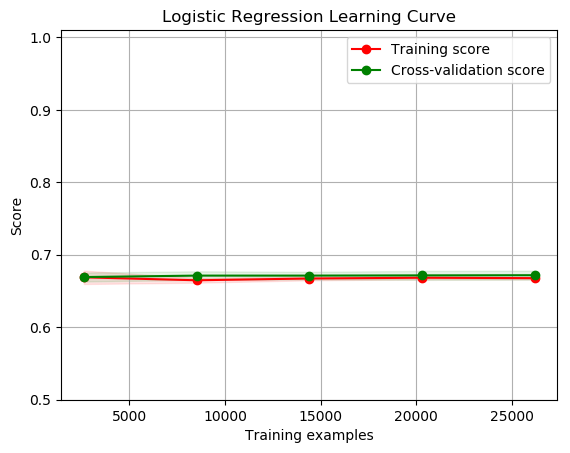

In [2530]:
plot_learning_curve(best_lr, 'Logistic Regression Learning Curve', X_train, y_train, (0.5, 1.01), cv=cv, n_jobs=4)

[0.24900969063601072,
 -0.41017955171546516,
 0.2523875530534982,
 0.13722004462695894,
 -0.13633568751135222,
 0.12656611361413447,
 0.5629959397918285,
 0.27117402739953345]

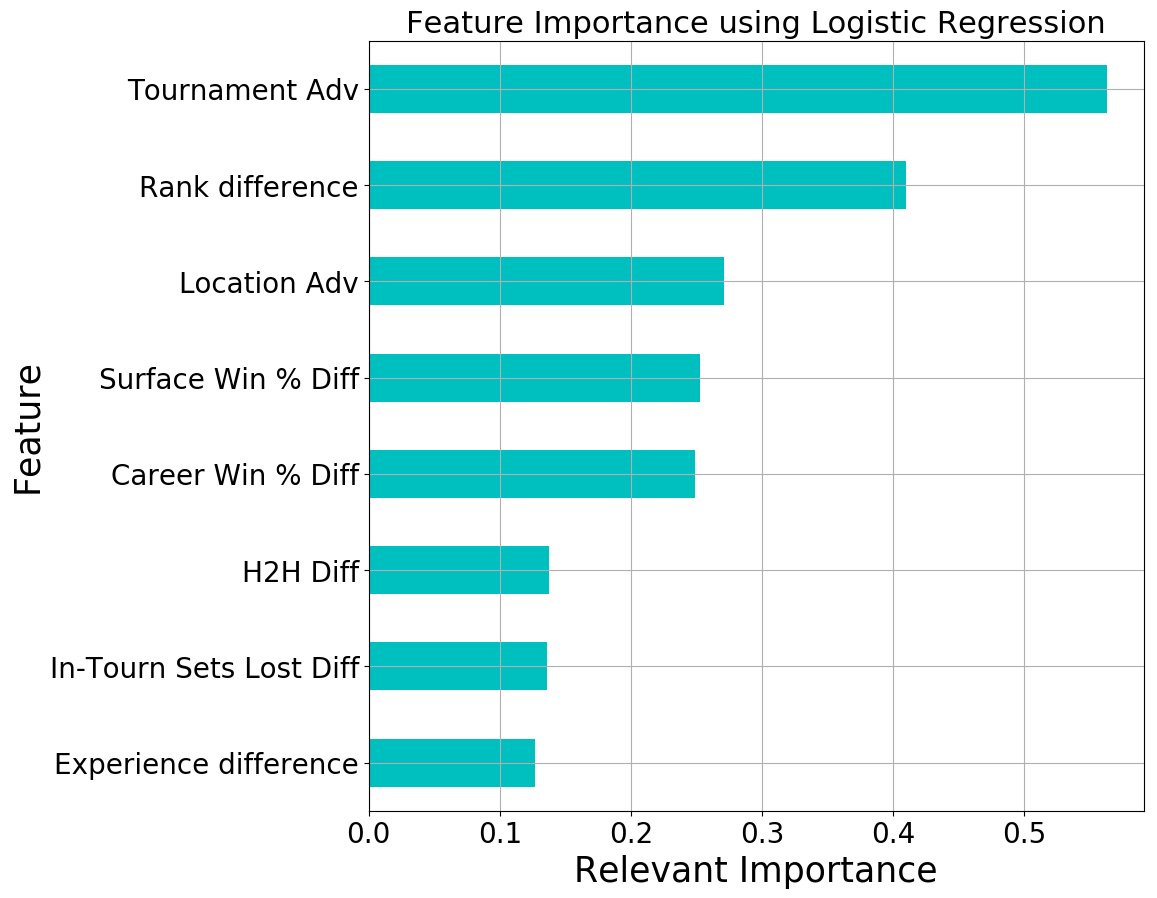

In [2542]:
#investigate feature importance
df_helper = pd.DataFrame()
df_helper['Feature'] = ['Career Win % Diff', 'Rank difference','Surface Win % Diff','H2H Diff', 
                        'In-Tourn Sets Lost Diff','Experience difference', 'Tournament Adv', 'Location Adv']
df_helper['Importance'] = np.abs([x for x in best_lr.coef_][0].tolist())

ax = df_helper.sort_values(by='Importance', ascending=True).plot(x='Feature', y='Importance',
                                                                      kind='barh', legend=False,
                                                                      grid=True, figsize=(10,10),
                                                                            fontsize=20, color = 'c')

ax.set_title('Feature Importance using Logistic Regression', fontsize=22)
ax.set_ylabel("Feature", fontsize=25);
ax.set_xlabel("Relevant Importance", fontsize=25);

## Gradient Boost

In [8]:
GBC =  GradientBoostingClassifier()

parameters = {
    
    'learning_rate': [0.1],
    'n_estimators':[100],
    'max_depth':[2]
    
    }

GB_gs = GridSearchCV(GBC, parameters, cv=3, verbose=1)
GB_gs.fit(X_train, y_train)

best_GB = GB_gs.best_estimator_
print(GB_gs.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished
/Users/Tazman/anaconda3/lib

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


In [71]:
evaluation(best_GB)

Train accuracy 0.6785223629980156
Test accuracy 0.6690558034081767
Train Log Loss 0.5944320395803534
Test Log Loss 0.6049569068420958


In [ ]:
log_loss(y_train, model.predict_proba(X_train))

In [2389]:
GBC =  GradientBoostingClassifier()

parameters = {
    "max_depth":[2,3,4],
    }

GB_gs = GridSearchCV(GBC, parameters, cv=3, verbose=1)
GB_gs.fit(X_train, y_train)

best_GB = GB_gs.best_estimator_
print(GB_gs.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversi

{'max_depth': 3}


In [132]:
evaluation(best_GB)

Train accuracy 0.6785223629980156
Test accuracy 0.6690558034081767
Train Log Loss 0.5944320395803534
Test Log Loss 0.6049569068420958


In [644]:
def plot_confusion_matrix(cm,
                          normalize=True,classes=['P1 loses','P1 wins'],
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    #plt.xticks_labels(fontsize=20)
    #plt.tick_marks(fontsize=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True Class', fontsize=20)
    plt.xlabel('Predicted Class', fontsize=20)
    
    plt.tight_layout()

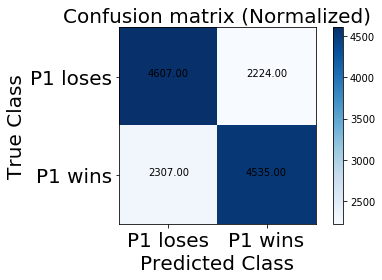

In [645]:
y_pred =  best_GB.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,title='Confusion matrix (Normalized)')

In [2391]:
print_cm_cr(y_test, best_GB.predict(X_test))

Predicted     0     1    All
Actual                      
0          4609  2222   6831
1          2303  4539   6842
All        6912  6761  13673

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      6831
           1       0.67      0.66      0.67      6842

   micro avg       0.67      0.67      0.67     13673
   macro avg       0.67      0.67      0.67     13673
weighted avg       0.67      0.67      0.67     13673



In [593]:
from sklearn.metrics import roc_curve, auc

In [594]:
yhat_pp = best_GB.predict_proba(X_test)

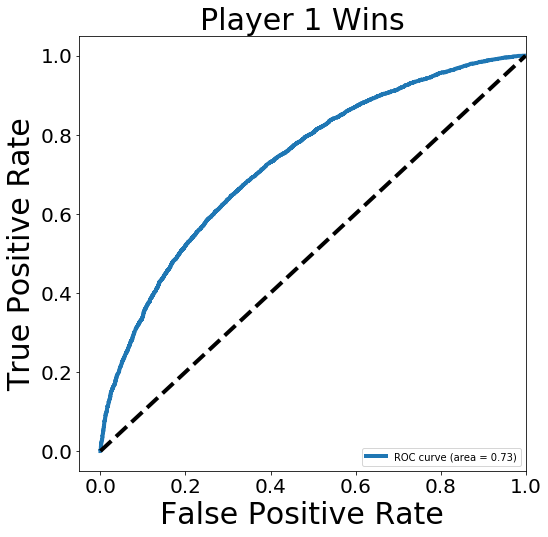

In [643]:
fpr, tpr, _ = roc_curve(y_test, yhat_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=30)
plt.ylabel('True Positive Rate', fontsize=30)
plt.title('Player 1 Wins', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="lower right")
plt.show()

<module 'matplotlib.pyplot' from '/Users/Tazman/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

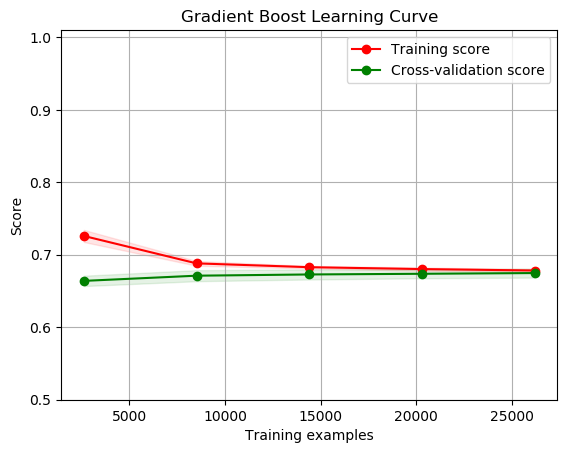

In [2526]:
plot_learning_curve(best_GB, 'Gradient Boost Learning Curve', X_train, y_train, (0.5, 1.01), cv=cv, n_jobs=4)

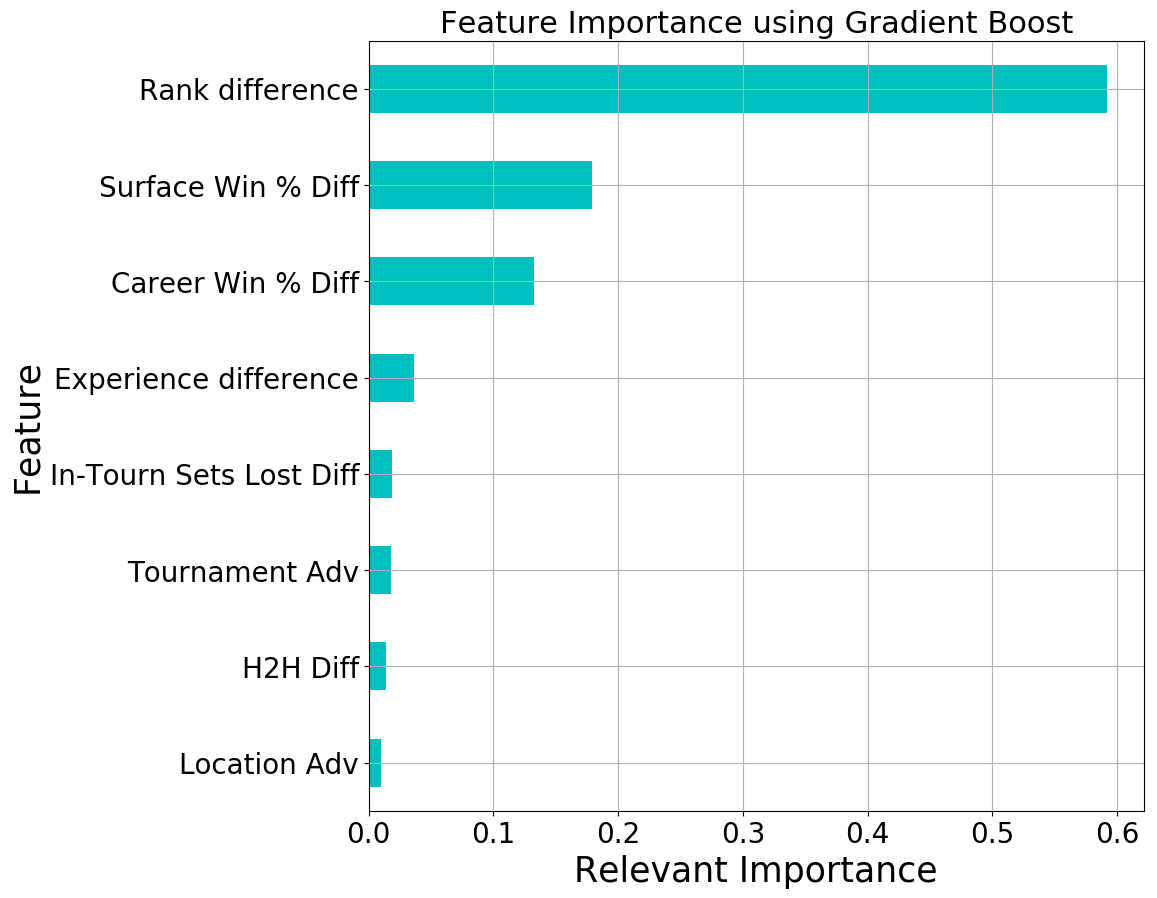

In [2534]:
#investigate feature importance
df_helper = pd.DataFrame()
df_helper['Feature'] = ['Career Win % Diff', 'Rank difference','Surface Win % Diff','H2H Diff', 
                        'In-Tourn Sets Lost Diff','Experience difference', 'Tournament Adv', 'Location Adv']
df_helper['Importance'] = best_GB.feature_importances_

ax = df_helper.sort_values(by='Importance', ascending=True).plot(x='Feature', y='Importance',
                                                                      kind='barh', legend=False,
                                                                      grid=True, figsize=(10,10),
                                                                            fontsize=20, color = 'c')

ax.set_title('Feature Importance using Gradient Boost', fontsize=22)
ax.set_ylabel("Feature", fontsize=25);
ax.set_xlabel("Relevant Importance", fontsize=25);

## KNN

In [538]:
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors':list(range(1,5)),
    'weights':['uniform']
}
knn_gs = GridSearchCV(knn, knn_params, cv=3)
knn_gs.fit(X_train, y_train)

best_knn = knn_gs.best_estimator_
print(knn_gs.best_params_)

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: Data

{'n_neighbors': 3, 'weights': 'uniform'}


In [2403]:
evaluation(best_knn)

Train accuracy 0.793191879102427
Test accuracy 0.6092298690850582
Train Log Loss 0.3949584121056215
Test Log Loss 4.454540673205797


In [2404]:
print_cm_cr(y_test, best_knn.predict(X_test))

Predicted     0     1    All
Actual                      
0          4208  2623   6831
1          2720  4122   6842
All        6928  6745  13673

              precision    recall  f1-score   support

           0       0.61      0.62      0.61      6831
           1       0.61      0.60      0.61      6842

   micro avg       0.61      0.61      0.61     13673
   macro avg       0.61      0.61      0.61     13673
weighted avg       0.61      0.61      0.61     13673



## Naive Bayes

In [539]:
gnb = GaussianNB()
best_gnb = gnb.fit(X_train, y_train)

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2406]:
evaluation(best_gnb)

Train accuracy 0.6638375820485422
Test accuracy 0.6598405616909238
Train Log Loss 0.709144919555177
Test Log Loss 0.7192290685980756


In [2407]:
print_cm_cr(y_test, best_gnb.predict(X_test))

Predicted     0     1    All
Actual                      
0          4562  2269   6831
1          2382  4460   6842
All        6944  6729  13673

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      6831
           1       0.66      0.65      0.66      6842

   micro avg       0.66      0.66      0.66     13673
   macro avg       0.66      0.66      0.66     13673
weighted avg       0.66      0.66      0.66     13673



## Decision Tree

In [540]:
DTC = DecisionTreeClassifier()
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

dtc_gs = GridSearchCV(DTC, dtc_params, cv=3, verbose=1)
dtc_gs.fit(X_train, y_train)

best_dtc = dtc_gs.best_estimator_
print(dtc_gs.best_params_)

Fitting 3 folds for each of 385 candidates, totalling 1155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 4, 'max_features': 5, 'min_samples_split': 3}


[Parallel(n_jobs=1)]: Done 1155 out of 1155 | elapsed:   54.7s finished


In [2409]:
evaluation(best_dtc)

Train accuracy 0.6650282399633644
Test accuracy 0.6629123089300081
Train Log Loss 0.619026436240262
Test Log Loss 0.6216925475412642


In [2410]:
print_cm_cr(y_test, best_dtc.predict(X_test))

Predicted     0     1    All
Actual                      
0          4314  2517   6831
1          2092  4750   6842
All        6406  7267  13673

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      6831
           1       0.65      0.69      0.67      6842

   micro avg       0.66      0.66      0.66     13673
   macro avg       0.66      0.66      0.66     13673
weighted avg       0.66      0.66      0.66     13673



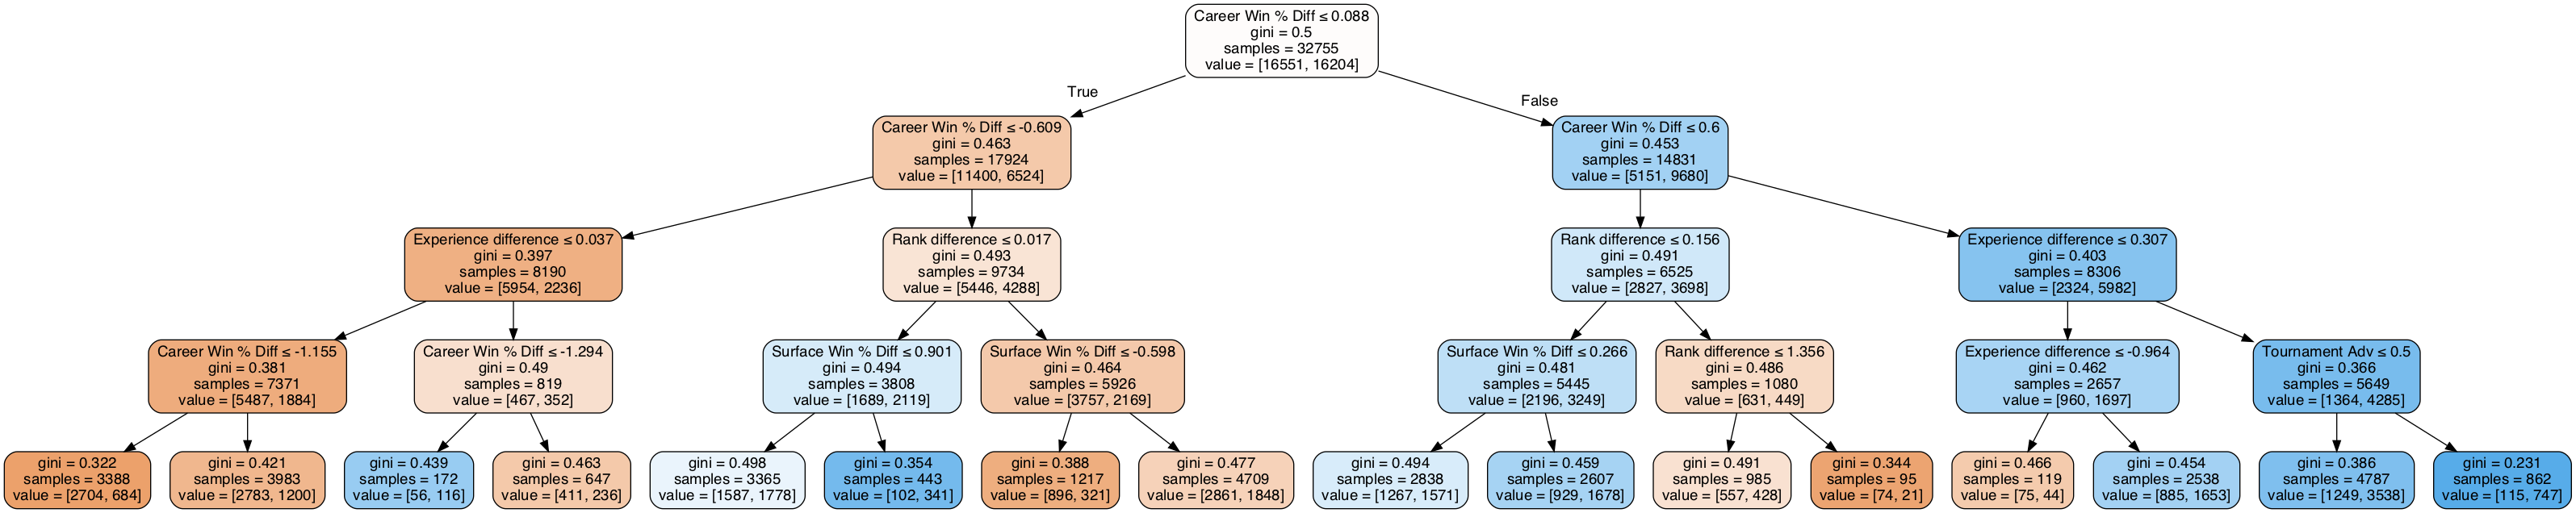

In [2421]:
# # create decision tree diagram

dot_data = StringIO() 
export_graphviz(best_dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                 feature_names=['Career Win % Diff', 'Rank difference','Surface Win % Diff','H2H Diff', 
                        'In-Tourn Sets Lost Diff','Experience difference', 'Tournament Adv', 'Location Adv'])  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest

In [541]:
RFC =  RandomForestClassifier()

rfc_params = {
 'bootstrap': [True, False],
 'max_depth': [None, 1, 2, 3],
}

rfc_gs = GridSearchCV(RFC, rfc_params, cv=3, verbose=1)
rfc_gs.fit(X_train, y_train)

best_rfc = rfc_gs.best_estimator_
print(rfc_gs.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

{'bootstrap': False, 'max_depth': 3}


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.7s finished
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [2423]:
evaluation(best_rfc)

Train accuracy 0.6669821401312777
Test accuracy 0.6659840561690924
Train Log Loss 0.620030179648103
Test Log Loss 0.6198217599021467


In [2424]:
print_cm_cr(y_test, best_rfc.predict(X_test))

Predicted     0     1    All
Actual                      
0          4682  2149   6831
1          2418  4424   6842
All        7100  6573  13673

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      6831
           1       0.67      0.65      0.66      6842

   micro avg       0.67      0.67      0.67     13673
   macro avg       0.67      0.67      0.67     13673
weighted avg       0.67      0.67      0.67     13673



<module 'matplotlib.pyplot' from '/Users/Tazman/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

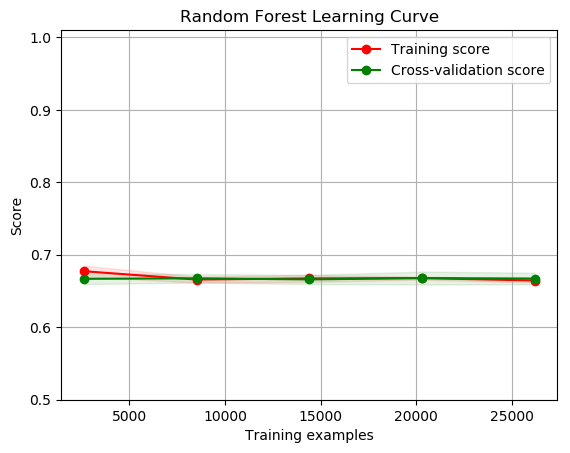

In [2527]:
plot_learning_curve(best_rfc, 'Random Forest Learning Curve', X_train, y_train, (0.5, 1.01), cv=cv, n_jobs=4)

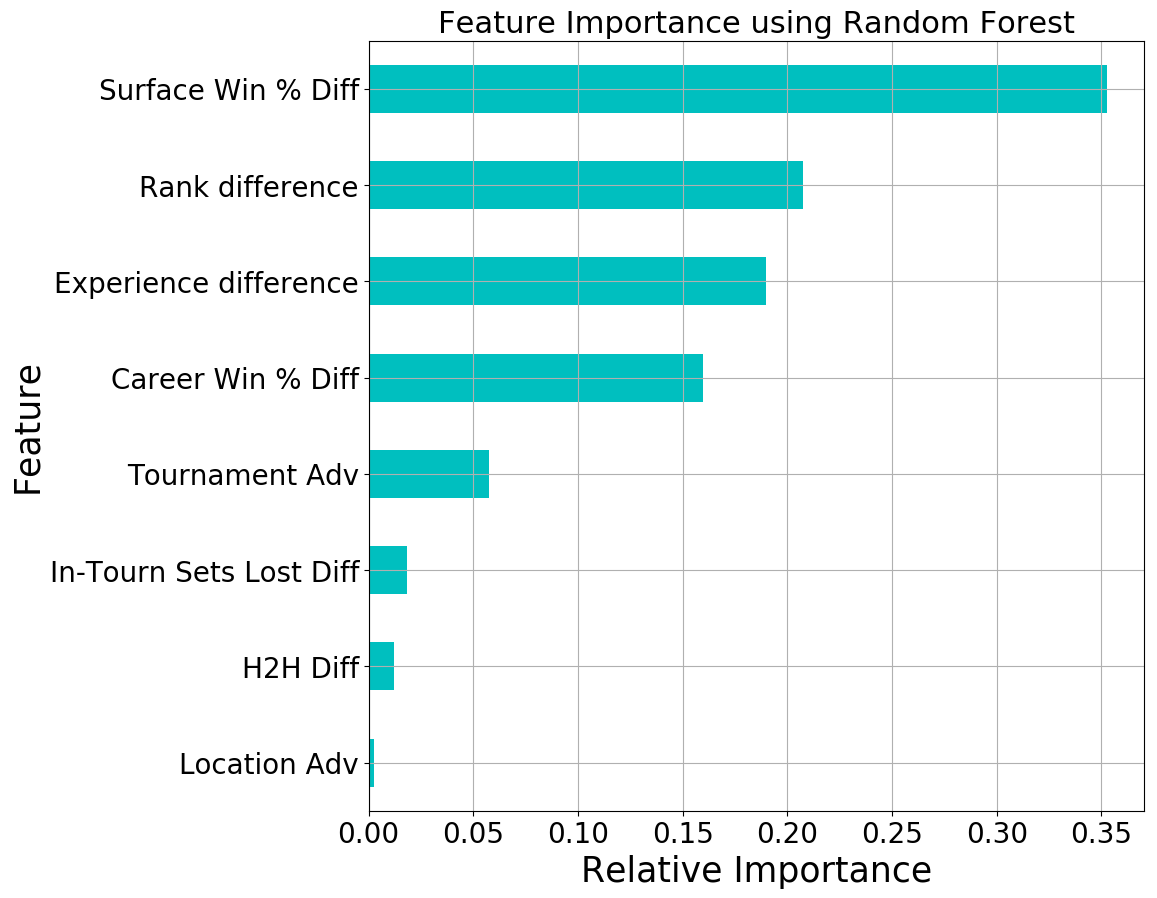

In [2533]:
#investigate feature importance
df_helper = pd.DataFrame()
df_helper['Feature'] = ['Career Win % Diff', 'Rank difference','Surface Win % Diff','H2H Diff', 
                        'In-Tourn Sets Lost Diff','Experience difference', 'Tournament Adv', 'Location Adv']
df_helper['Importance'] = best_rfc.feature_importances_

ax = df_helper.sort_values(by='Importance', ascending=True).plot(x='Feature', y='Importance',
                                                                      kind='barh', legend=False,
                                                                      grid=True, figsize=(10,10),
                                                                            fontsize=20, color = 'c')

ax.set_title('Feature Importance using Random Forest', fontsize=22)
ax.set_ylabel("Feature", fontsize=25);
ax.set_xlabel("Relative Importance", fontsize=25);

## Comparison of models

In [565]:
# let's compare the accuracy of different models
accuracy = pd.DataFrame()
accuracy['Logistic Regression'] = [best_lr.score(X_test, y_test), log_loss(y_test, best_lr.predict_proba(X_test))]
accuracy['Gradient Boost'] = [best_GB.score(X_test, y_test), log_loss(y_test, best_GB.predict_proba(X_test))]
accuracy['KNN'] = [best_knn.score(X_test, y_test), log_loss(y_test, best_knn.predict_proba(X_test))]
accuracy['Naive Bayes'] = [best_gnb.score(X_test, y_test), log_loss(y_test, best_gnb.predict_proba(X_test))]
accuracy['Decision Tree'] = [best_dtc.score(X_test, y_test), log_loss(y_test, best_dtc.predict_proba(X_test))]
accuracy['Random Forest'] = [best_rfc.score(X_test, y_test), log_loss(y_test, best_rfc.predict_proba(X_test))]
accuracy['Baseline'] = [0.5, 0]

In [566]:
accuracy = accuracy.T
accuracy.columns = ['Accuracy', 'Log Loss']

In [567]:
accuracy['Accuracy'] = np.round(accuracy['Accuracy'] *100, 1)
accuracy['Log Loss'] = np.round(accuracy['Log Loss'], 3)

In [568]:
accuracy = accuracy.sort_values(by='Accuracy', ascending=False)

In [575]:
accuracy = accuracy.T
accuracy.drop(columns='Baseline', inplace=True)
accuracy=accuracy.T


KeyError: "['Baseline'] not found in axis"

In [579]:
accuracy = accuracy.T

In [581]:
accuracy = accuracy.sort_values(by='Log Loss')

In [550]:
accuracy.index

Index(['Logistic Regression', 'Gradient Boost', 'KNN', 'Naive Bayes',
       'Decision Tree', 'Random Forest', 'Baseline'],
      dtype='object')

In [554]:
accuracy['Accuracy']

Logistic Regression    66.2
Gradient Boost         66.9
KNN                    60.9
Naive Bayes            66.0
Decision Tree          66.5
Random Forest          66.5
Baseline               65.9
Name: Accuracy, dtype: float64

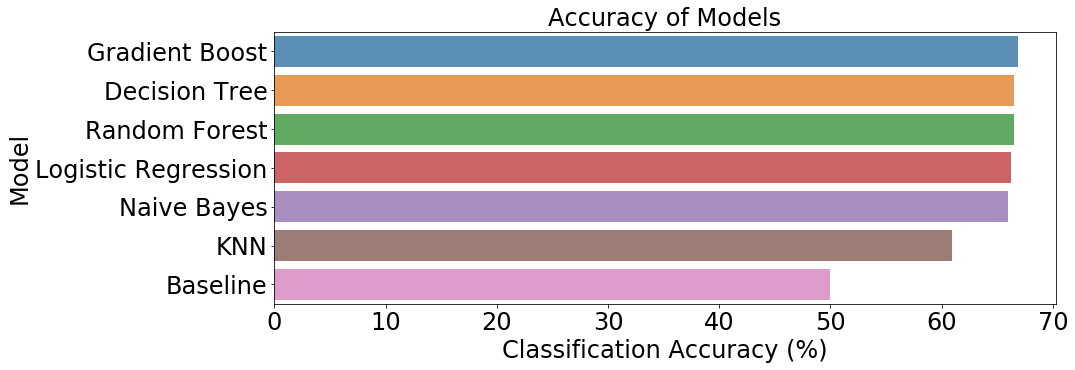

In [572]:
#newyorkTimezone = df['Location'].value_counts(normalize=True).head(10)*100
plt.figure(figsize=(14, 5))
sns.barplot(accuracy['Accuracy'], accuracy.index, alpha=0.8)
plt.title('Accuracy of Models', fontsize=24)
plt.ylabel('Model', fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Classification Accuracy (%)', fontsize=24)
plt.xticks(fontsize=24)
plt.show()

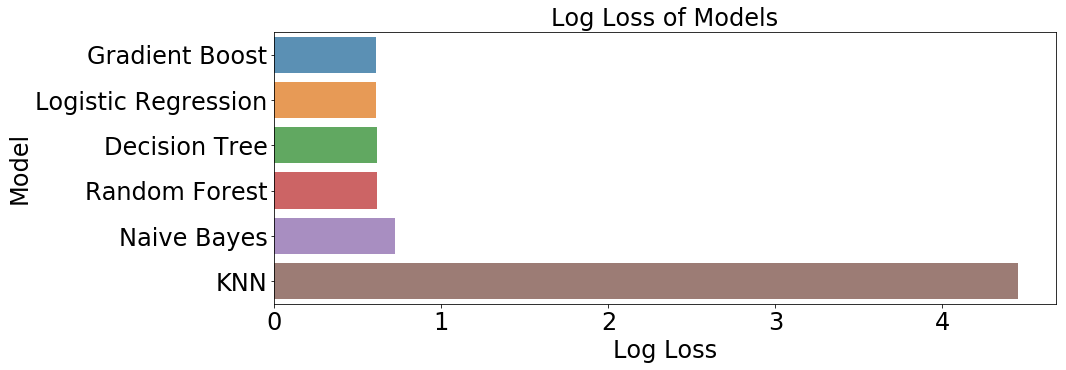

In [583]:
#newyorkTimezone = df['Location'].value_counts(normalize=True).head(10)*100
plt.figure(figsize=(14, 5))
sns.barplot(accuracy['Log Loss'], accuracy.index, alpha=0.8)
plt.title('Log Loss of Models', fontsize=24)
plt.ylabel('Model', fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Log Loss', fontsize=24)
plt.xticks(fontsize=24)
plt.show()

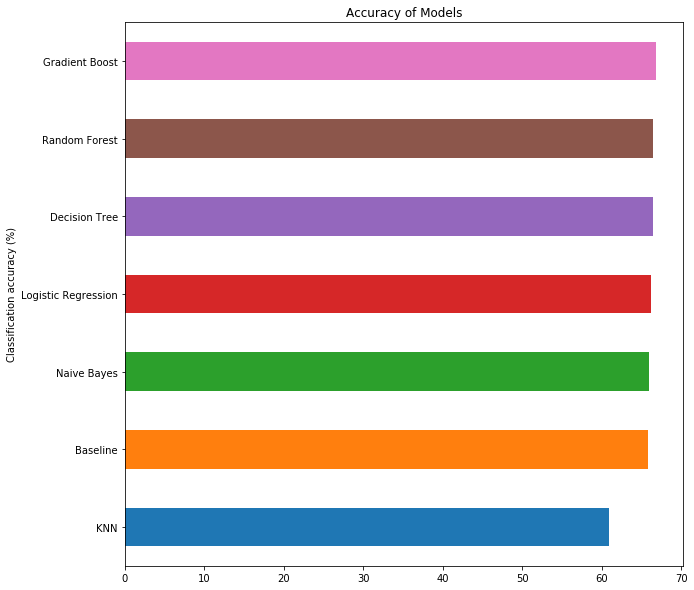

In [549]:
ax = accuracy.sort_values(by='Accuracy', ascending=True)['Accuracy'].plot(kind='barh', figsize=(10, 10));
ax.set_title('Accuracy of Models');
ax.set_ylabel('Classification accuracy (%)');

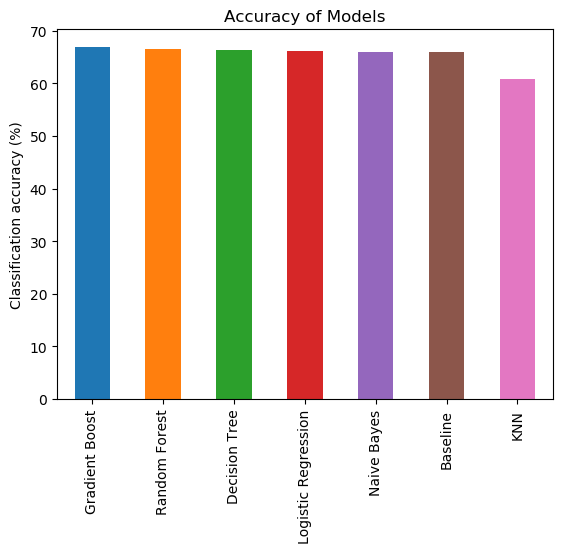

In [2548]:
ax = accuracy.sort_values(by='Accuracy', ascending=False)['Accuracy'].plot(kind='bar');
ax.set_title('Accuracy of Models');
ax.set_ylabel('Classification accuracy (%)');

In [2519]:
accuracy = accuracy.T

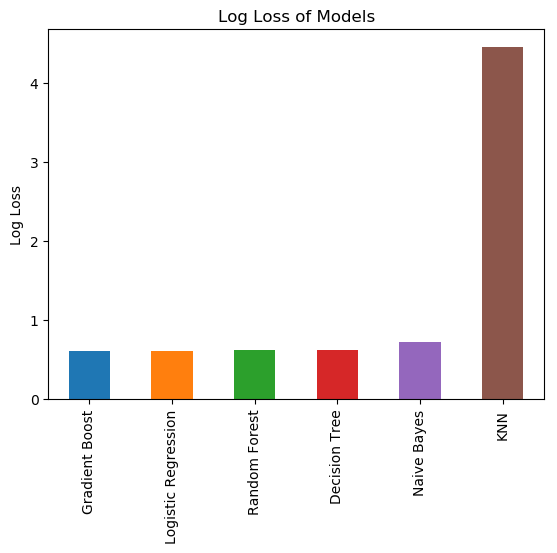

In [2529]:
ax = accuracy.sort_values(by='Log Loss', ascending=True)['Log Loss'].plot(kind='bar');
ax.set_title('Log Loss of Models');
ax.set_ylabel('Log Loss');

Gradient Boost has the best accuracy and the best log loss

# Maximising ROI